<div class="alert alert-block alert-danger">

# FIT5149 Assignment1
    
#### Student Name: Syed Kabir
#### Student ID: 32312016

Date: 14/11/2021

    
</div>

<div class="alert alert-block alert-info">
    
## Table of Contents

</div>

[1. Introduction](#Intro) <br>
[2. EDA](#task1) <br>
$\;\;\;\;$[2.1. Univariate analysis](#Univariate) <br>
$\;\;\;\;$[2.2. Bivariate analysis](#Bivariate) <br>
$\;\;\;\;$[2.3. Multivariate analysis](#More) <br>
$\;\;\;\;$[2.4. Summary](#Summary) <br>
[3. Model Development](#MD) <br>
[4. Model Scoring on Test Data](#MScore) <br>
[5. Model Interpretation and Inference](#MInterp) <br>
[6. Variable Importance](#VarImp) <br>
[7. Marketing Suggestions](#MarktSugst) <br>
[8. Conclusion](#Conclusion) <br>
[9. References](#Ref) <br>

In [37]:
#install.packages('plyr', repos="http://cran.rstudio.com/")
#install.packages('ggplot2', repos="http://cran.rstudio.com/")
#install.packages('psych')
#install.packages('gridExtra')
#install.packages('ISLR')
#install.packages('MASS')
install.packages('caret', repos="http://cran.rstudio.com/")
#install.packages('car')
#install.packages('psych')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [416]:
library(psych)
library(gridExtra) 
library(ggplot2)
library(car)
library(caret)
library(tidyverse) 
library(magrittr)
library(MASS)
library(psych)


<div class="alert alert-block alert-success">

<br>    
    
## 1.  **Introduction**  <a class="anchor" name="Intro">

    
</a>

This assignment is to perform exploratory data analysis on insurance data followed by appropriate modelling to predict whether a customer of a insurance company will stay or leave. Sixteen distinguishing factors are given in the data-set in understanding the customer churn. Two data-sets are given:

$\;\;$  a) trainSet.csv which contains 27126 observations

$\;\;$  b) testSet.csv which contains 6782 observations

$\;$ So, trainSet data will be used to perform exploratory analysis and training the model. Two distinguished models will be build-up using training data. On the other hand, testSet.csv will be used for identifying model accuracy and selecting better model.

In [417]:
insurance1 <- read.csv('trainSet.csv', header = TRUE, sep = ',')

In [418]:
testset <- read.csv('testSet.csv', header = TRUE, sep = ',')

In [419]:
head(insurance1)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1.5127910,-0.2434605,0.1434182,2.01858846,0.07622994,-0.4114531,-0.2519404,1,1,1,0,1,0,0,0,3,0
2,-1.5007763,-0.2125875,1.2248391,-0.15984112,-0.56935064,-0.4114531,-0.2519404,8,2,1,0,0,0,0,8,3,0
3,0.9477471,0.5812426,-0.3372133,0.77987360,-0.56935064,-0.4114531,-0.2519404,0,2,1,0,0,0,2,8,3,0
4,-0.8415585,-0.2217837,0.5038918,-0.37729577,0.39902023,-0.4114531,-0.2519404,9,1,1,0,0,0,0,1,3,0
5,-0.5590365,-0.5922597,-1.1783185,-0.41612696,-0.56935064,-0.4114531,-0.2519404,1,2,1,0,1,0,0,8,3,0
6,0.9477471,-0.4654833,-0.5775291,0.08867847,-0.24656035,2.2551433,2.3528870,4,2,2,1,1,0,0,8,0,0


In [420]:
# Now, let's check the number of variables, rows, variable names and their types
str(insurance1)

'data.frame':	27126 obs. of  17 variables:
 $ feature_0 : num  1.513 -1.501 0.948 -0.842 -0.559 ...
 $ feature_1 : num  -0.243 -0.213 0.581 -0.222 -0.592 ...
 $ feature_2 : num  0.143 1.225 -0.337 0.504 -1.178 ...
 $ feature_3 : num  2.019 -0.16 0.78 -0.377 -0.416 ...
 $ feature_4 : num  0.0762 -0.5694 -0.5694 0.399 -0.5694 ...
 $ feature_5 : num  -0.411 -0.411 -0.411 -0.411 -0.411 ...
 $ feature_6 : num  -0.252 -0.252 -0.252 -0.252 -0.252 ...
 $ feature_7 : int  1 8 0 9 1 4 7 6 6 9 ...
 $ feature_8 : int  1 2 2 1 2 2 1 1 1 1 ...
 $ feature_9 : int  1 1 1 1 1 2 1 2 1 3 ...
 $ feature_10: int  0 0 0 0 0 1 0 0 0 0 ...
 $ feature_11: int  1 0 0 0 1 1 0 1 1 1 ...
 $ feature_12: int  0 0 0 0 0 0 0 1 1 0 ...
 $ feature_13: int  0 0 2 0 0 0 0 2 0 0 ...
 $ feature_14: int  0 8 8 1 8 8 1 6 5 9 ...
 $ feature_15: int  3 3 3 3 3 0 3 3 3 3 ...
 $ labels    : int  0 0 0 0 0 0 0 0 0 0 ...


The structure of the training data set shows that:

* feature_o, feature_1, feature_2, feature_3,feature_4, feature_5 and feature_6 are continuous type numerical variables.

* feature_7, feature_8, feature_9, feature_10,feature_11, feature_12, feature_13, feature_14 and feature_15 are discrete type variables.

In [421]:
# Let's check how many unique values are avilable for each variable:
sapply(insurance1, function(x) length(unique(x)))

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6 
        77       5901         31       1403         46        499         35 
 feature_7  feature_8  feature_9 feature_10 feature_11 feature_12 feature_13 
        12          3          4          2          2          2          3 
feature_14 feature_15     labels 
        12          4          2

* So, feature_1 has highest highest number of unique values.
* feature_10, feature_11, feature_12, labels are of binary.
* feature_8 and feature_13 have three unique values : 0,1 and 2
* feature_9 and feature_15 have four unique values : 0,1,2 and 3

<div class="alert alert-block alert-success">

<br>
    
## 2. **EDA** : <a class="anchor" name="task1">
    
<br>
    
</a>

### 2.0.1: Summary Statistics: Prior to data normalization 

In [422]:
summary(insurance1)

   feature_0           feature_1           feature_2        
 Min.   :-2.159994   Min.   :-3.081149   Min.   :-1.779108  
 1st Qu.:-0.747384   1st Qu.:-0.422458   1st Qu.:-0.938003  
 Median :-0.182341   Median :-0.296996   Median : 0.023260  
 Mean   :-0.004908   Mean   : 0.001337   Mean   : 0.003681  
 3rd Qu.: 0.665225   3rd Qu.: 0.023886   3rd Qu.: 0.624050  
 Max.   : 5.091402   Max.   :26.222907   Max.   : 1.825629  
   feature_3           feature_4           feature_5        
 Min.   :-1.002478   Min.   :-0.569351   Min.   :-0.411453  
 1st Qu.:-0.602517   1st Qu.:-0.569351   1st Qu.:-0.411453  
 Median :-0.307400   Median :-0.246560   Median :-0.411453  
 Mean   :-0.002433   Mean   :-0.000047   Mean   :-0.002946  
 3rd Qu.: 0.232354   3rd Qu.: 0.076230   3rd Qu.:-0.411453  
 Max.   :18.094700   Max.   :19.443647   Max.   : 8.127648  
   feature_6           feature_7        feature_8      feature_9    
 Min.   :-0.251940   Min.   : 0.000   Min.   :0.00   Min.   :0.000  
 1st Qu.

In [423]:

round(describe(insurance1), 3)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
feature_0,1,27126,-0.005,1.000,-0.182,-0.068,0.977,-2.160,5.091,7.251,0.677,0.292,0.006
feature_1,2,27126,0.001,0.986,-0.297,-0.193,0.223,-3.081,26.223,29.304,7.503,103.612,0.006
feature_2,3,27126,0.004,1.000,0.023,-0.010,1.247,-1.779,1.826,3.605,0.088,-1.058,0.006
feature_3,4,27126,-0.002,0.997,-0.307,-0.186,0.530,-1.002,18.095,19.097,3.157,18.827,0.006
feature_4,5,27126,0.000,1.009,-0.247,-0.210,0.479,-0.569,19.444,20.013,5.101,44.119,0.006
feature_5,6,27126,-0.003,0.997,-0.411,-0.285,0.000,-0.411,8.128,8.539,2.639,7.088,0.006
feature_6,7,27126,-0.009,0.795,-0.252,-0.197,0.000,-0.252,23.626,23.878,7.360,96.290,0.005
feature_7,8,27126,4.336,3.273,4.000,4.242,4.448,0.000,11.000,11.000,0.268,-1.265,0.020
feature_8,9,27126,1.170,0.605,1.000,1.213,0.000,0.000,2.000,2.000,-0.098,-0.423,0.004


Some observations from the Summary:

* The range for feature_1,feature_3,feature_4 and feature_6 is relatively high (from 19 to 29) across the samples compared to other variables.
* The range for feature_0,feature_5,feature_11 is moderately large (from 7 to 11) across the samples compared to other variables. The value of other features varies from 0 to 3.157
* The minimum value for feature_1 to feature_6 is negative. For others, minimum value is zero. 
* The mean value for feature_1 to feature_6 is very close to zero(some are negatives). For others, mean is positive.
* The median value for feature_1 to feature_6 is negatives. For others, median value is positive. 


So values of different features varie in different scales. If the data isn’t normalized it will lead to a baised outcome.

### 2.0.2: Summary Statistics and Variances: After data normalization 

In [424]:
#Normalization
normalize <- function(x) {
return ((x - min(x)) / (max(x) - min(x))) }

In [425]:
insurance <- as.data.frame(lapply(insurance1, normalize))

In [426]:
summary(insurance)

   feature_0        feature_1         feature_2        feature_3      
 Min.   :0.0000   Min.   :0.00000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.1948   1st Qu.:0.09073   1st Qu.:0.2333   1st Qu.:0.02094  
 Median :0.2727   Median :0.09501   Median :0.5000   Median :0.03640  
 Mean   :0.2972   Mean   :0.10519   Mean   :0.4946   Mean   :0.05237  
 3rd Qu.:0.3896   3rd Qu.:0.10596   3rd Qu.:0.6667   3rd Qu.:0.06466  
 Max.   :1.0000   Max.   :1.00000   Max.   :1.0000   Max.   :1.00000  
   feature_4         feature_5         feature_6         feature_7      
 Min.   :0.00000   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.09091  
 Median :0.01613   Median :0.00000   Median :0.00000   Median :0.36364  
 Mean   :0.02845   Mean   :0.04784   Mean   :0.01017   Mean   :0.39421  
 3rd Qu.:0.03226   3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.63636  
 Max.   :1.00000   Max.   :1.00000   Max.   :1.00000   Max.   :1.

So, all the features are normalised in the range of 0 to 1. Binary variables remain unchanged.
The variance of the data after normalization is:

In [427]:
sort(apply(insurance[-17], 2, sd))

feature_6  feature_1  feature_4  feature_3  feature_5 feature_10  feature_0 
0.03328427 0.03366124 0.05042517 0.05218207 0.11681114 0.13251602 0.13790212 
 feature_9 feature_14  feature_2  feature_7  feature_8 feature_15 feature_12 
0.24976134 0.27306086 0.27728047 0.29756154 0.30249105 0.32889883 0.36564728 
feature_13 feature_11 
0.44815779 0.49727677

So, after normaloisation, it is clear that feature_1,feature_3,feature_4,feature_6 has very low variance and feature_11 has the highest variance.

<div class="alert alert-block alert-warning">

### 2.1. Univariate Analysis <a class="anchor" name="Univariate"></a>

### 2.1.0 : Data is imbalanced in Target Variable:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



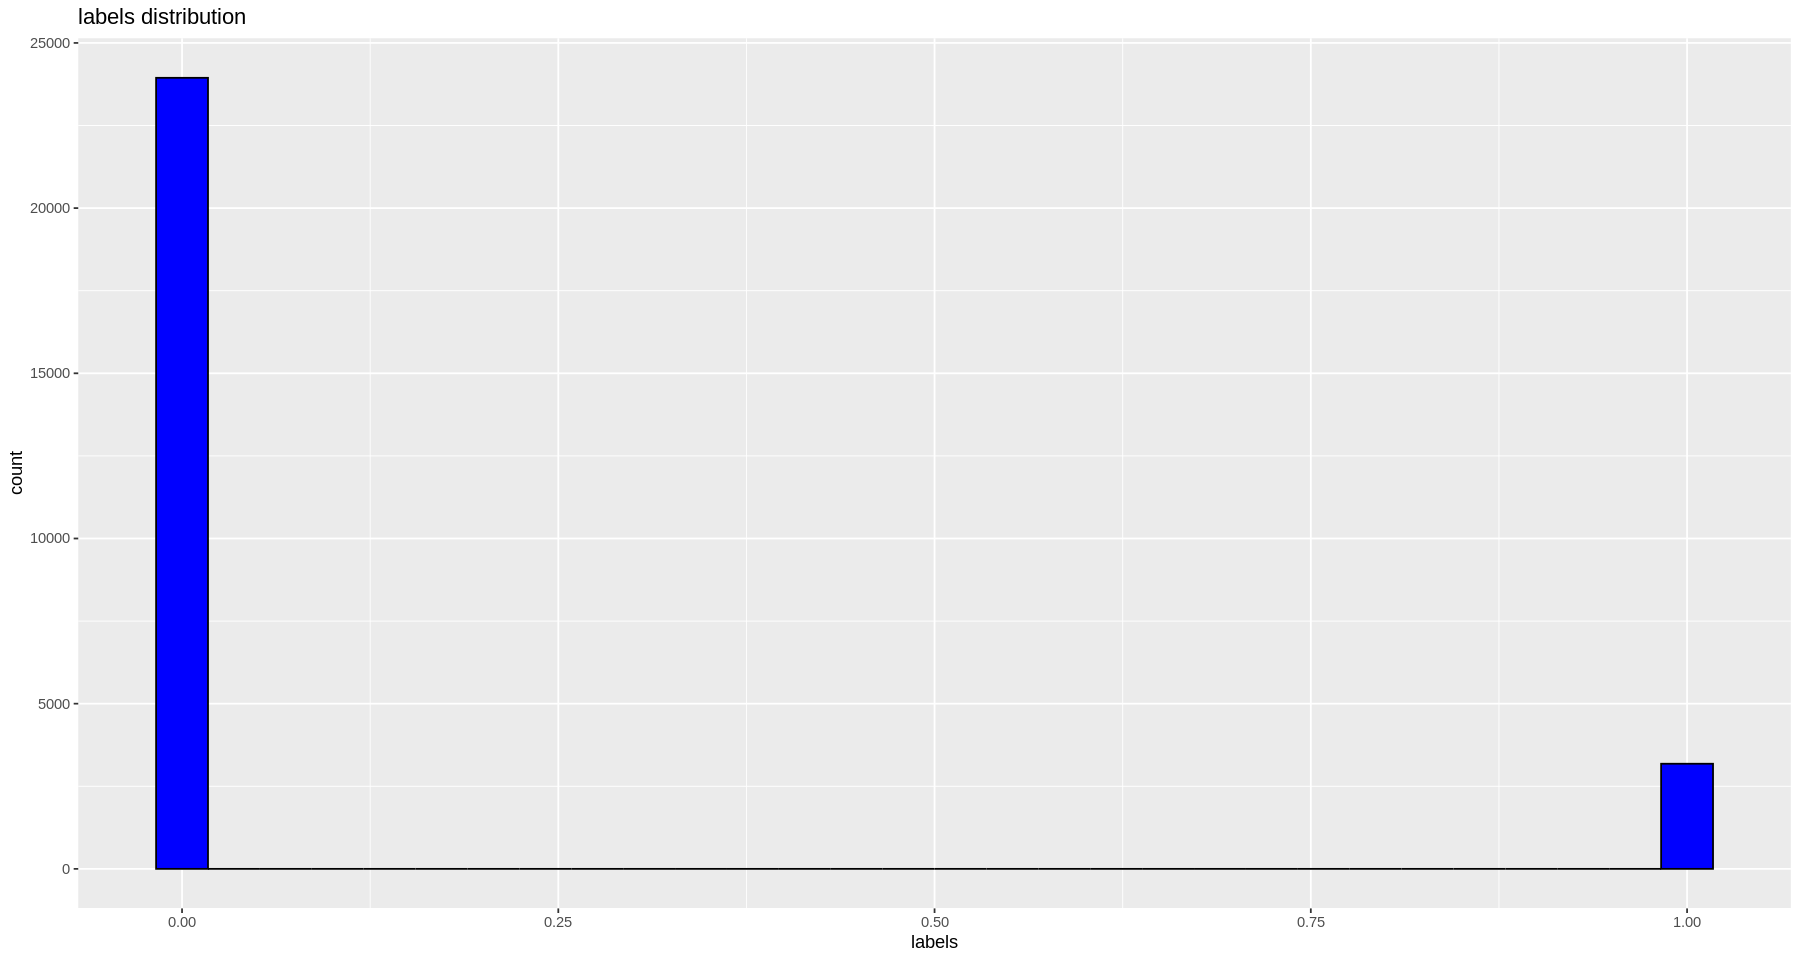

In [428]:
p16<-ggplot(aes(x=labels), data =  insurance) +
   geom_histogram(color = I('black'), fill = "blue") +
   ggtitle('labels distribution')
p16

*  Majority of the labels are zero. So, the data is heavily imbalanced 

###. 2.1.1 : Outliers among the features:

* Boxplot of feature_0, feature_1, feature_3, feature_4, feature_5, feature_6 are showing many outliers for higher values.
* Only feature_1 and feature_15 have outliers for lower values.

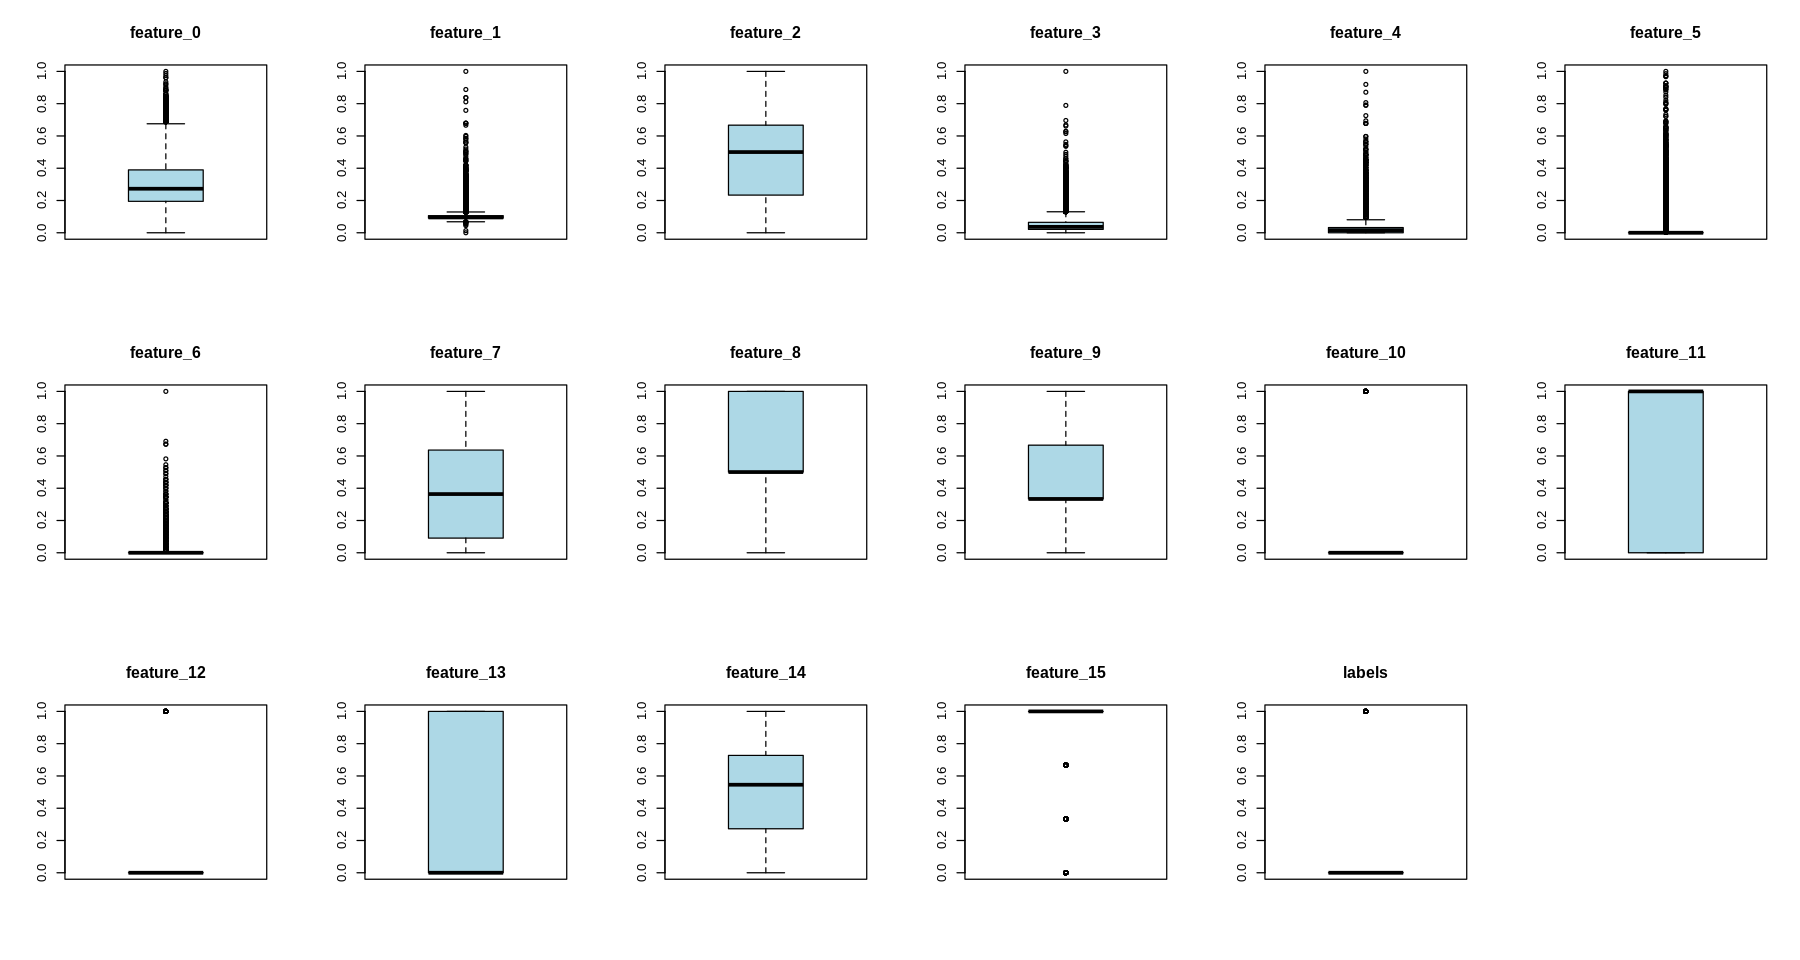

In [429]:

par(mfrow = c(3,6)) # 6 x 2 grid
for (i in 1:(length(insurance))) {
        boxplot(insurance[,i], main = names(insurance[i]), type="l", col = 'lightblue') 
}


* It is very hard to assess the distribution observing the boxplot for many features. So let's have a look on distribution for features

### 2.1.2: Histogram of all variables:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better valu

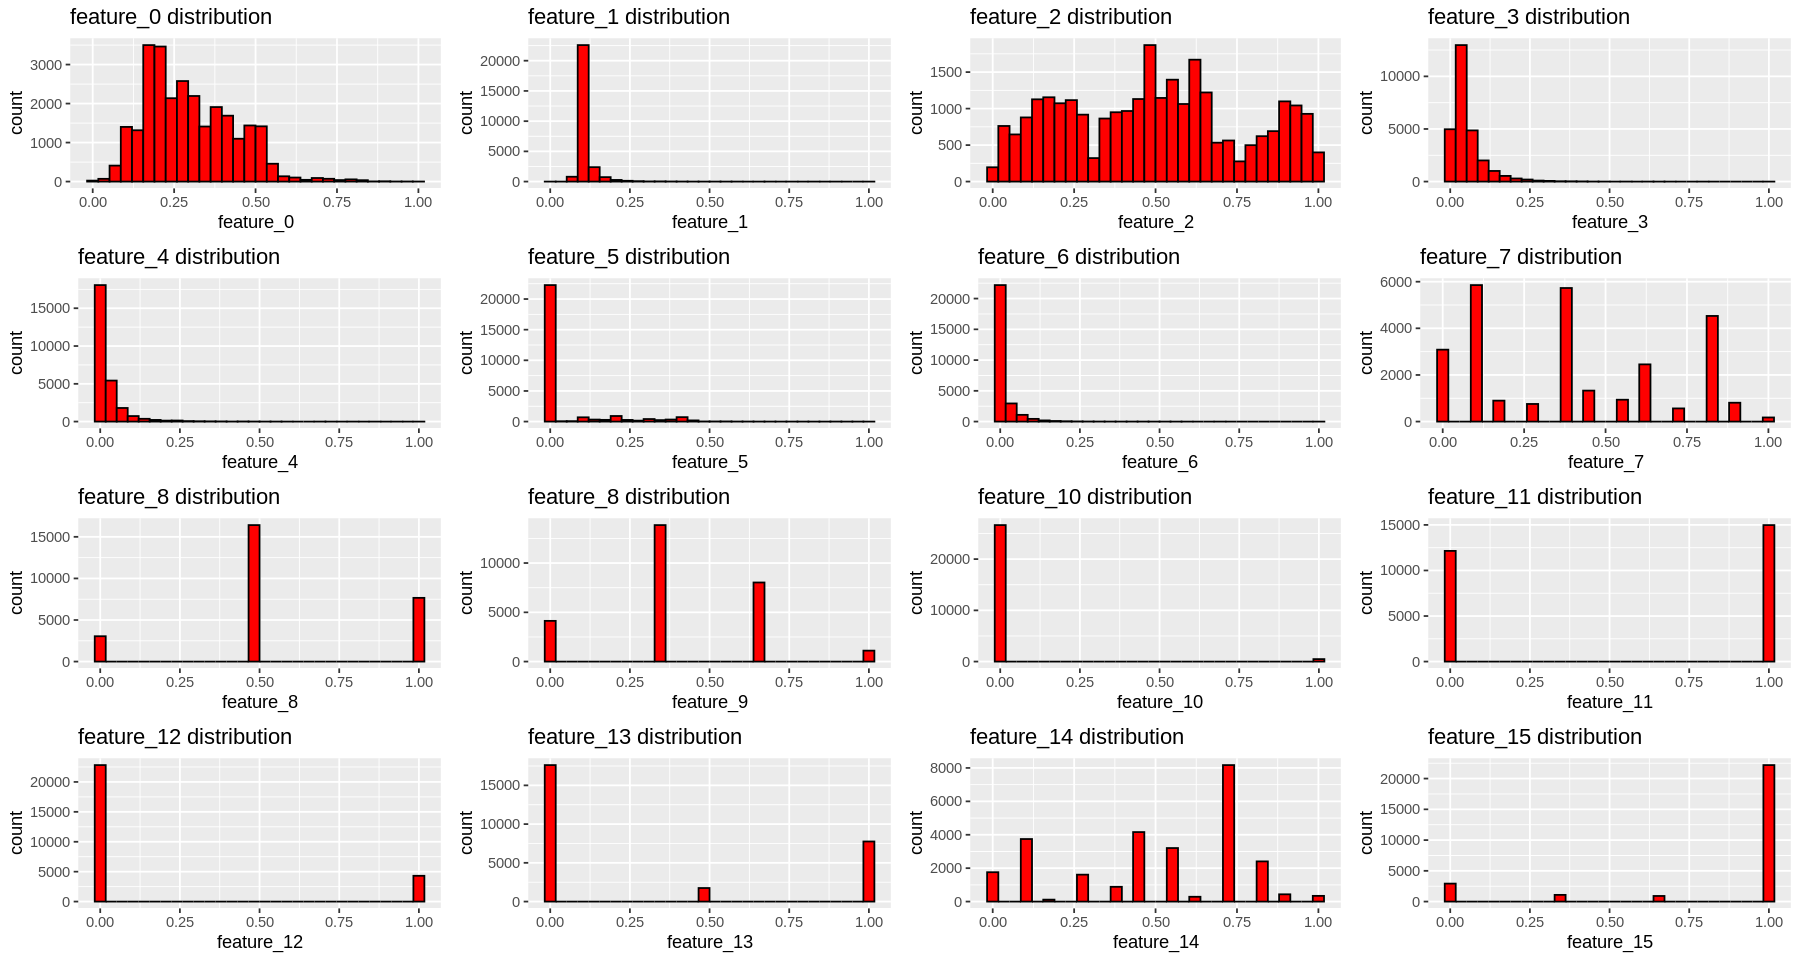

In [430]:
options(repr.plot.width=15, repr.plot.height=8)
p0<-ggplot(aes(x=feature_0), data =  insurance) +
    geom_histogram(color = I('black'), fill = "red") + 
    ggtitle('feature_0 distribution')

p1<-ggplot(aes(x=feature_1), data =  insurance) +
    geom_histogram(color = I('black'), fill = "red") + 
    ggtitle('feature_1 distribution')

p2<-ggplot(aes(x=feature_2), data =  insurance) +
    geom_histogram(color = I('black'), fill = "red") + 
    ggtitle('feature_2 distribution')

p3<-ggplot(aes(x=feature_3), data =  insurance) +
    geom_histogram(color = I('black'), fill = "red") + 
    ggtitle('feature_3 distribution')

p4<-ggplot(aes(x=feature_4), data =  insurance) +
    geom_histogram(color = I('black'), fill = "red") + 
    ggtitle('feature_4 distribution')

p5<-ggplot(aes(x=feature_5), data =  insurance) +
    geom_histogram(color = I('black'), fill = "red") + 
    ggtitle('feature_5 distribution')

p6<-ggplot(aes(x=feature_6), data =  insurance) +
    geom_histogram(color = I('black'), fill = "red") +
    ggtitle('feature_6 distribution')

p7<-ggplot(aes(x=feature_7), data =  insurance) +
    geom_histogram(color = I('black'), fill = "red") +
    ggtitle('feature_7 distribution')

p8<-ggplot(aes(x=feature_8), data =  insurance) +
    geom_histogram(color = I('black'), fill = "red") +
    ggtitle('feature_8 distribution')

p9<-ggplot(aes(x=feature_9), data =  insurance) +
    geom_histogram(color = I('black'), fill = "red") +
    ggtitle('feature_8 distribution')

p10<-ggplot(aes(x=feature_10), data =  insurance) +
    geom_histogram(color = I('black'), fill = "red") +
    ggtitle('feature_10 distribution')

p11<-ggplot(aes(x=feature_11), data =  insurance) +
    geom_histogram(color = I('black'), fill = "red") +
    ggtitle('feature_11 distribution')

p12<-ggplot(aes(x=feature_12), data =  insurance) +
    geom_histogram(color = I('black'), fill = "red") +
    ggtitle('feature_12 distribution')

p13<-ggplot(aes(x=feature_13), data =  insurance) +
    geom_histogram(color = I('black'), fill = "red") +
    ggtitle('feature_13 distribution')

p14<-ggplot(aes(x=feature_14), data =  insurance) +
    geom_histogram(color = I('black'), fill = "red") +
    ggtitle('feature_14 distribution')

p15<-ggplot(aes(x=feature_15), data =  insurance) +
    geom_histogram(color = I('black'), fill = "red") +
    ggtitle('feature_15 distribution')

#p16<-ggplot(aes(x=labels), data =  insurance) +
#    geom_histogram(color = I('black'), fill = "red") +
#    ggtitle('labels distribution')

# plot all 16, 4 x 4 

grid.arrange(p0, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13, p14, p15, ncol = 4)

* feature_0 is showing close to a uniform distribution with right skewness. 
* feature_1, feature_3, feature_4,feature_5 and feature_6 are heavily right skewed. 
* feature_2 distribution is multimodal. Significant number of values are negative.
* labels distribution clearly shows that only a fraction of customer will churn.

<div class="alert alert-block alert-warning">

### 2.2. Bivariate Analysis <a class="anchor" name="Bivariate"></a>

### 2.2.1 : Correlations among the features

In [25]:
round(cor(insurance[1:17]),3)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
feature_0,1.000,0.105,-0.006,-0.008,0.003,-0.023,-0.001,-0.026,-0.405,-0.107,-0.018,-0.182,-0.014,0.029,-0.041,0.007,0.016
feature_1,0.105,1.000,0.005,0.016,-0.016,0.007,0.026,0.020,-0.005,0.062,-0.068,-0.075,-0.086,-0.030,0.011,-0.025,0.051
feature_2,-0.006,0.005,1.000,-0.027,0.167,-0.092,-0.052,0.019,-0.008,0.023,0.011,-0.028,0.009,-0.030,-0.003,0.080,-0.030
feature_3,-0.008,0.016,-0.027,1.000,-0.084,0.003,0.000,0.000,0.005,0.004,-0.012,0.006,-0.003,-0.022,0.008,0.009,0.390
feature_4,0.003,-0.016,0.167,-0.084,1.000,-0.092,-0.047,0.007,-0.006,0.010,0.020,-0.021,0.000,0.028,-0.110,0.106,-0.076
feature_5,-0.023,0.007,-0.092,0.003,-0.092,1.000,0.547,-0.018,0.018,0.003,-0.035,0.122,-0.024,-0.244,0.032,-0.855,0.111
feature_6,-0.001,0.026,-0.052,0.000,-0.047,0.547,1.000,0.005,0.022,0.021,-0.022,0.035,-0.013,-0.180,0.028,-0.596,0.119
feature_7,-0.026,0.020,0.019,0.000,0.007,-0.018,0.005,1.000,0.063,0.166,-0.007,-0.128,-0.035,-0.083,-0.090,0.008,0.037
feature_8,-0.405,-0.005,-0.008,0.005,-0.006,0.018,0.022,0.063,1.000,0.111,-0.005,-0.019,-0.051,-0.036,-0.004,-0.015,0.043
feature_9,-0.107,0.062,0.023,0.004,0.010,0.003,0.021,0.166,0.111,1.000,-0.012,-0.092,-0.046,-0.113,-0.059,-0.023,0.069


The following features are highly corelated:
* feature 5 and feature 15 are highly corelated negatively.

The following features are moderatelyly corelated:
* feature 0 and feature 8 negatively
* feature 5 and feature 6 positively
* feature 6 and feature 15 negatively
* feature 13 and feature 14 positively

The following features are low corelated:
* feature 0 and feature 11 negatively
* feature 2 and feature 4 positively
* feature 5 and feature 13 negatively
* feature 6 and feature 13 negatively
* feature 7 and feature 9 positively
* feature 11 and feature 13 positively
* feature 11 and feature 14 positively
* feature 13 and feature 15 positively

The following features are corelated with labels:
* feature_3 positively moderate correlation
* feature_5, feature_6 low positive correlation
* feature_11, feature_13 low negative correlation

### 2.2.2: Plot for Strongest Corelations

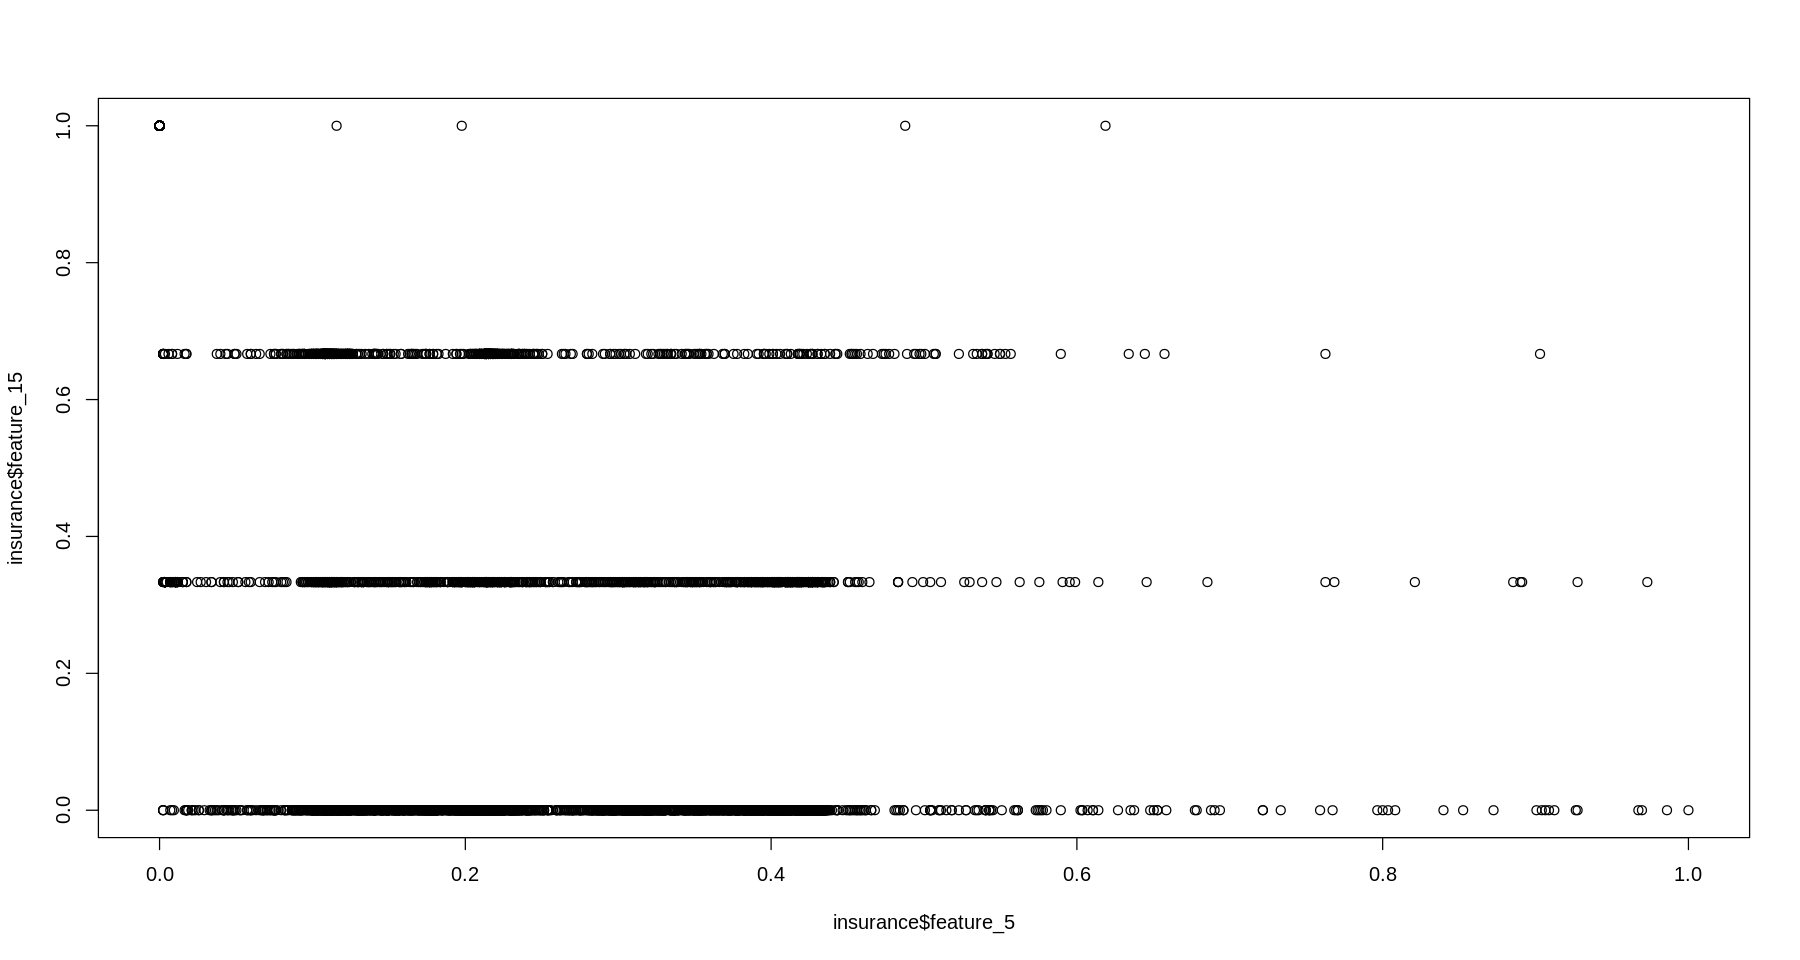

In [26]:
plot(insurance$feature_5, insurance$feature_15)

* Very high value (=3) of feature_15 is only available when feature_5 values are relatively low(<6)
* feature_5 values are in higher range more when feature_15 values are relatively low.

### 2.2.3: Investigating feature_3 which has strongest correlations with labels

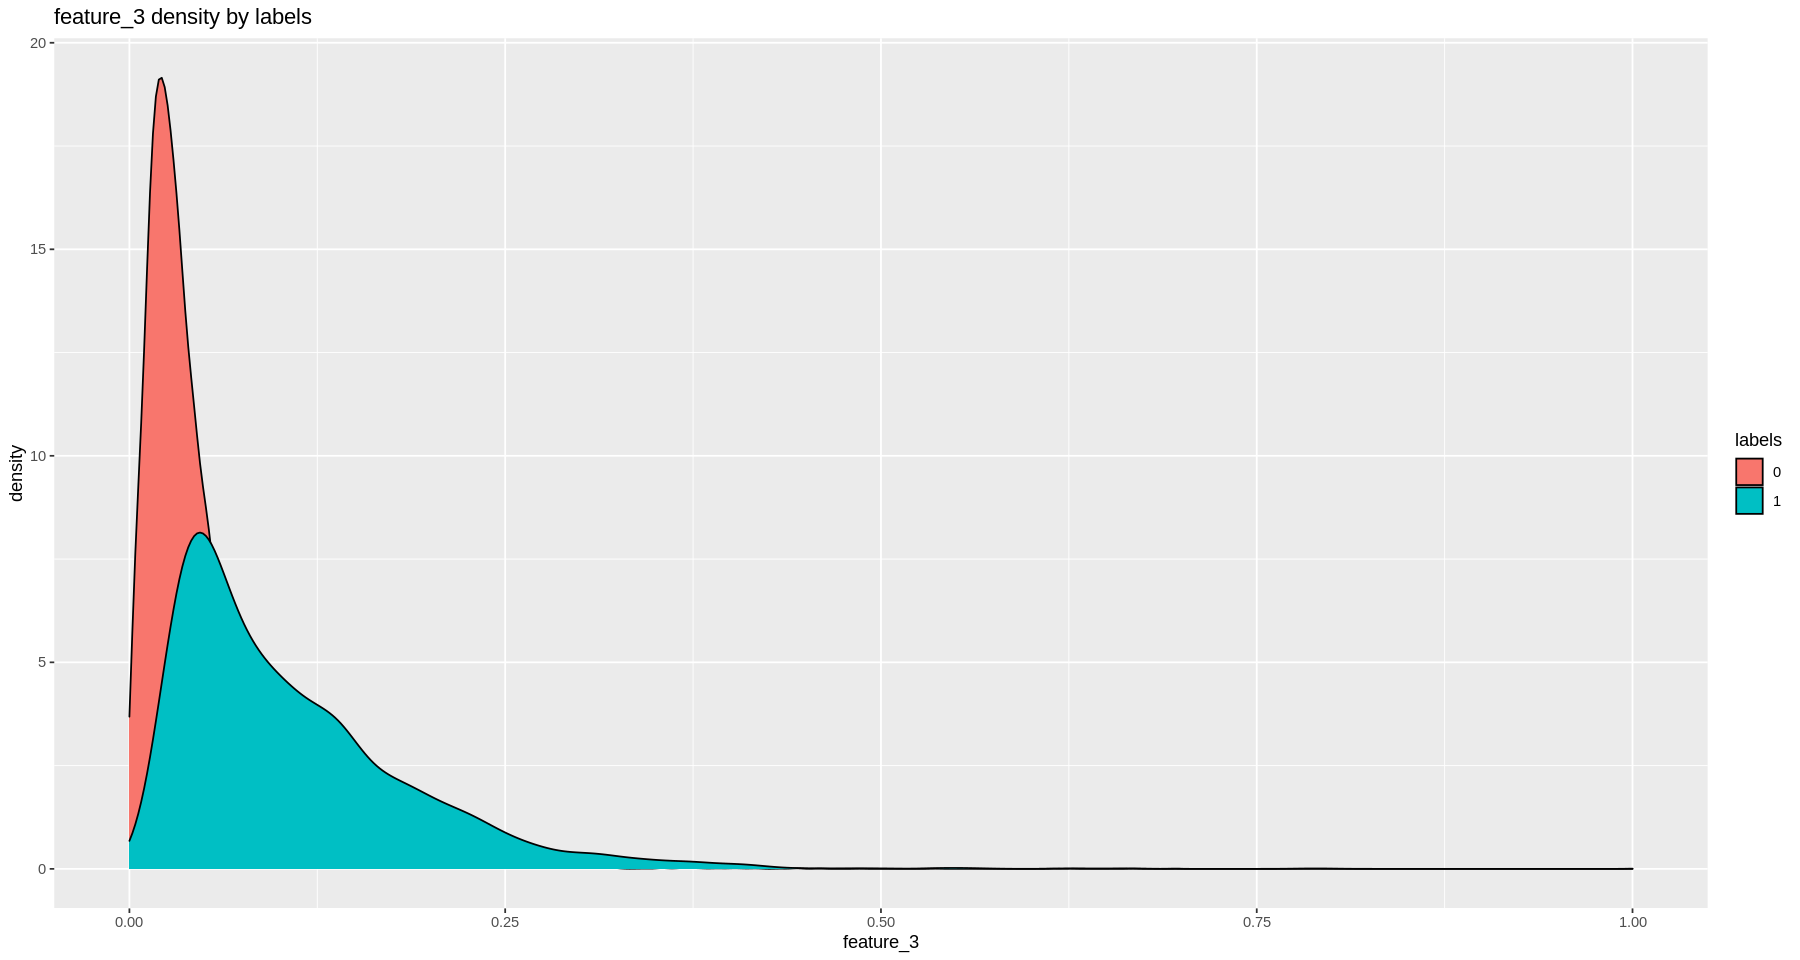

In [99]:
# For better analysis, labels is converted to factor type
# As feature_3 has higher correlation with labels, let's investigate the this two variables
insurance$labels <- as.factor(insurance$labels)
p4 = ggplot(aes(x=feature_3),data =insurance) + geom_density(aes(fill = labels)) +  ggtitle('feature_3 density by labels')
p4

It is clearly evident that data density is distributed with low spreading for feature_3 when labels value is 0 compared to 1 value.

### 2.2.4: Investigating data spreading of all features w.r.t the classes of labels

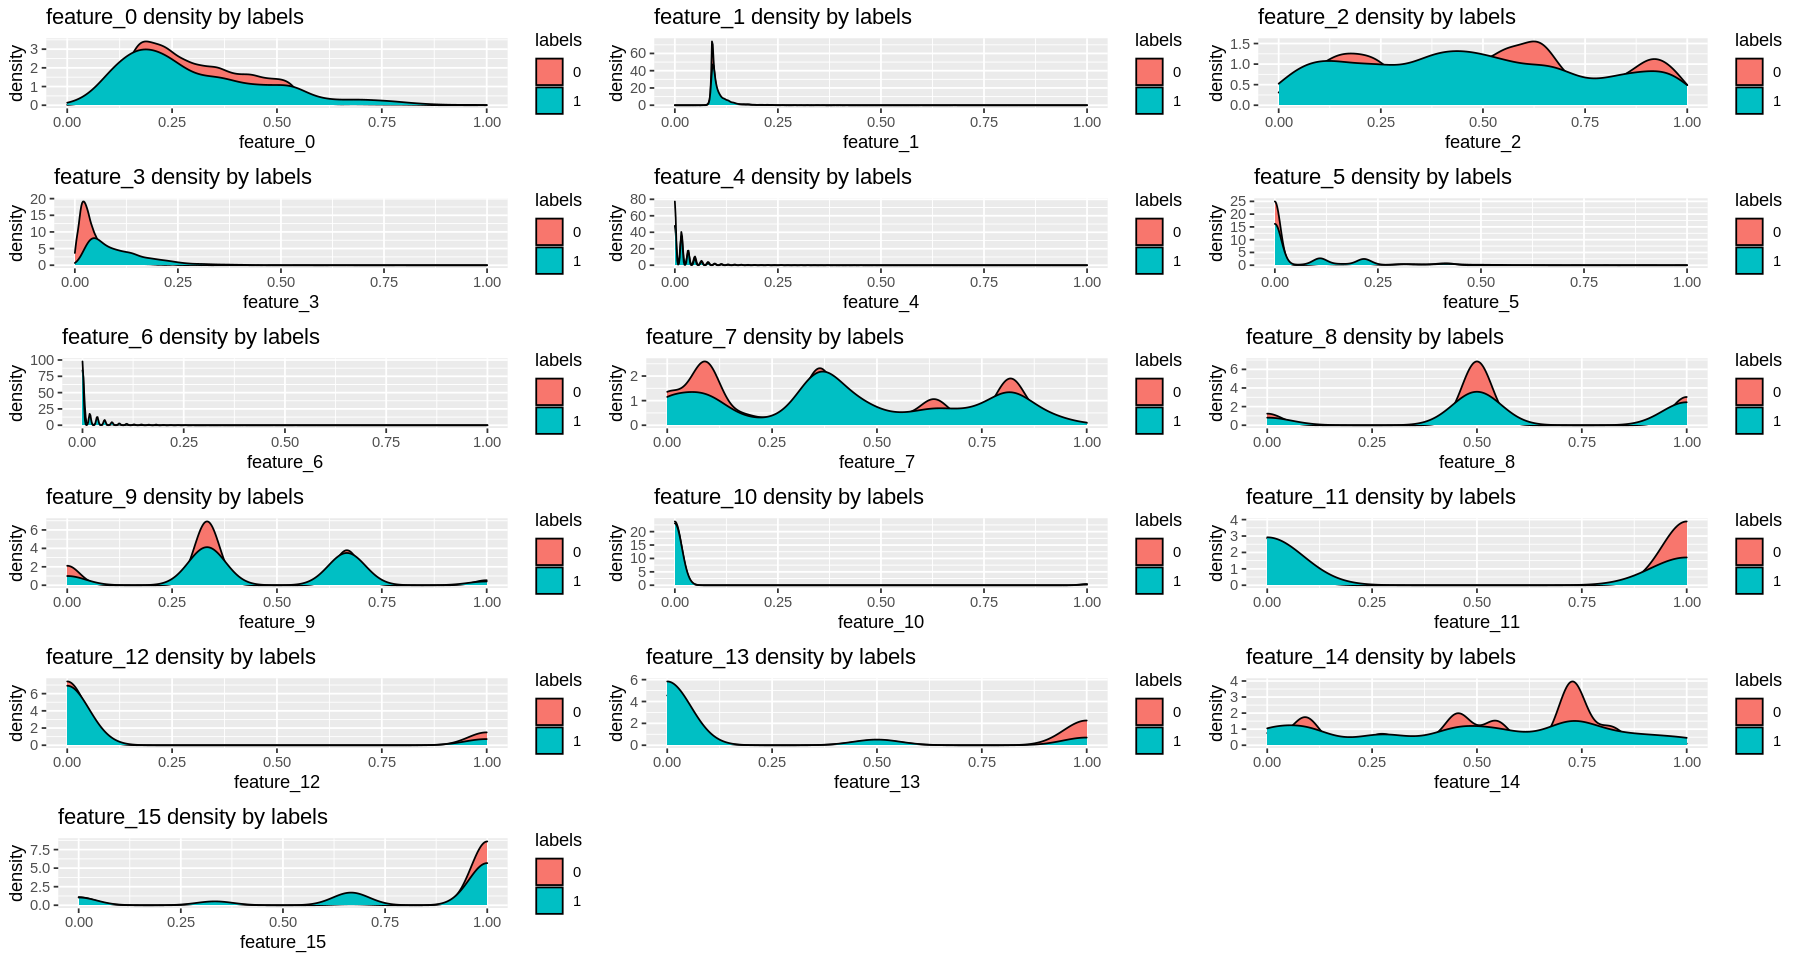

In [29]:

p1=ggplot(aes(x=feature_0),data =insurance) + geom_density(aes(fill = labels)) +  ggtitle('feature_0 density by labels')
p2= ggplot(aes(x=feature_1),data =insurance) + geom_density(aes(fill = labels)) +  ggtitle('feature_1 density by labels')
p3 = ggplot(aes(x=feature_2),data =insurance) + geom_density(aes(fill = labels)) +  ggtitle('feature_2 density by labels')
p4 = ggplot(aes(x=feature_3),data =insurance) + geom_density(aes(fill = labels)) +  ggtitle('feature_3 density by labels')
p5 = ggplot(aes(x=feature_4),data =insurance) + geom_density(aes(fill = labels)) +  ggtitle('feature_4 density by labels')
p6 = ggplot(aes(x=feature_5),data =insurance) + geom_density(aes(fill = labels)) +  ggtitle('feature_5 density by labels')
p7 = ggplot(aes(x=feature_6),data =insurance) + geom_density(aes(fill = labels)) +  ggtitle('feature_6 density by labels')
p8 = ggplot(aes(x=feature_7),data =insurance) + geom_density(aes(fill = labels)) +  ggtitle('feature_7 density by labels')
p9 = ggplot(aes(x=feature_8),data =insurance) + geom_density(aes(fill = labels)) +  ggtitle('feature_8 density by labels')
p10 = ggplot(aes(x=feature_9),data =insurance) + geom_density(aes(fill = labels)) +  ggtitle('feature_9 density by labels')
p11 = ggplot(aes(x=feature_10),data =insurance) + geom_density(aes(fill = labels)) +  ggtitle('feature_10 density by labels')
p12 = ggplot(aes(x=feature_11),data =insurance) + geom_density(aes(fill = labels)) +  ggtitle('feature_11 density by labels')
p13 = ggplot(aes(x=feature_12),data =insurance) + geom_density(aes(fill = labels)) +  ggtitle('feature_12 density by labels')
p14 = ggplot(aes(x=feature_13),data =insurance) + geom_density(aes(fill = labels)) +  ggtitle('feature_13 density by labels')
p15 = ggplot(aes(x=feature_14),data =insurance) + geom_density(aes(fill = labels)) +  ggtitle('feature_14 density by labels')
p16 = ggplot(aes(x=feature_15),data =insurance) + geom_density(aes(fill = labels)) +  ggtitle('feature_15 density by labels')
grid.arrange( p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16, ncol = 3)


* No feature shows specific independence in data spreading for each values of labels.

### 2.2.5: Investigating relations among continuous features

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE,

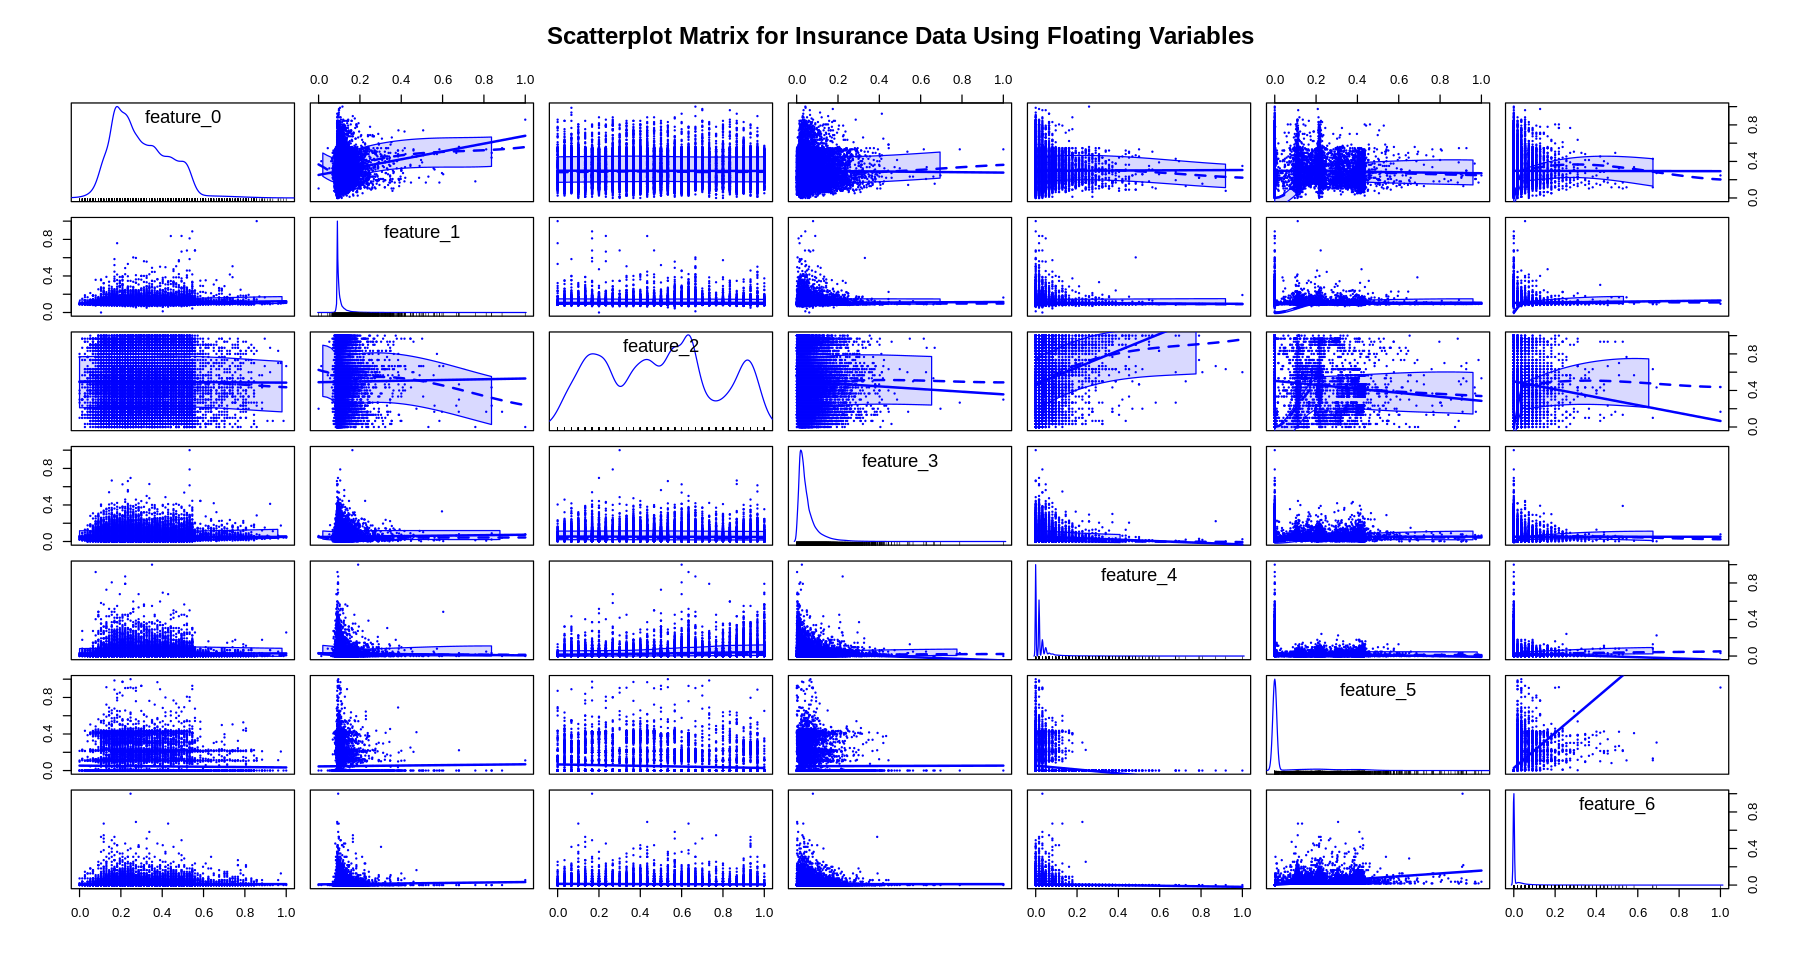

In [413]:
# Now let's investigate the continuous features and labels in the data.
library(car) 
scatterplotMatrix(insurance[,c(1:7)],cex=0.2,main="Scatterplot Matrix for Insurance Data Using Floating Variables")


* Feature_3 has nonlinear negative relationship with almost all numeric features.
*Feature_1 and feature_4 has non-linear negative relationship with feature_6
* feature_1 and feature_4 relationship is also nonlinear negative.

### 2.3.1: Multivariate EDA : Feature_3 data spreading for each labels and for each value of feature_15.

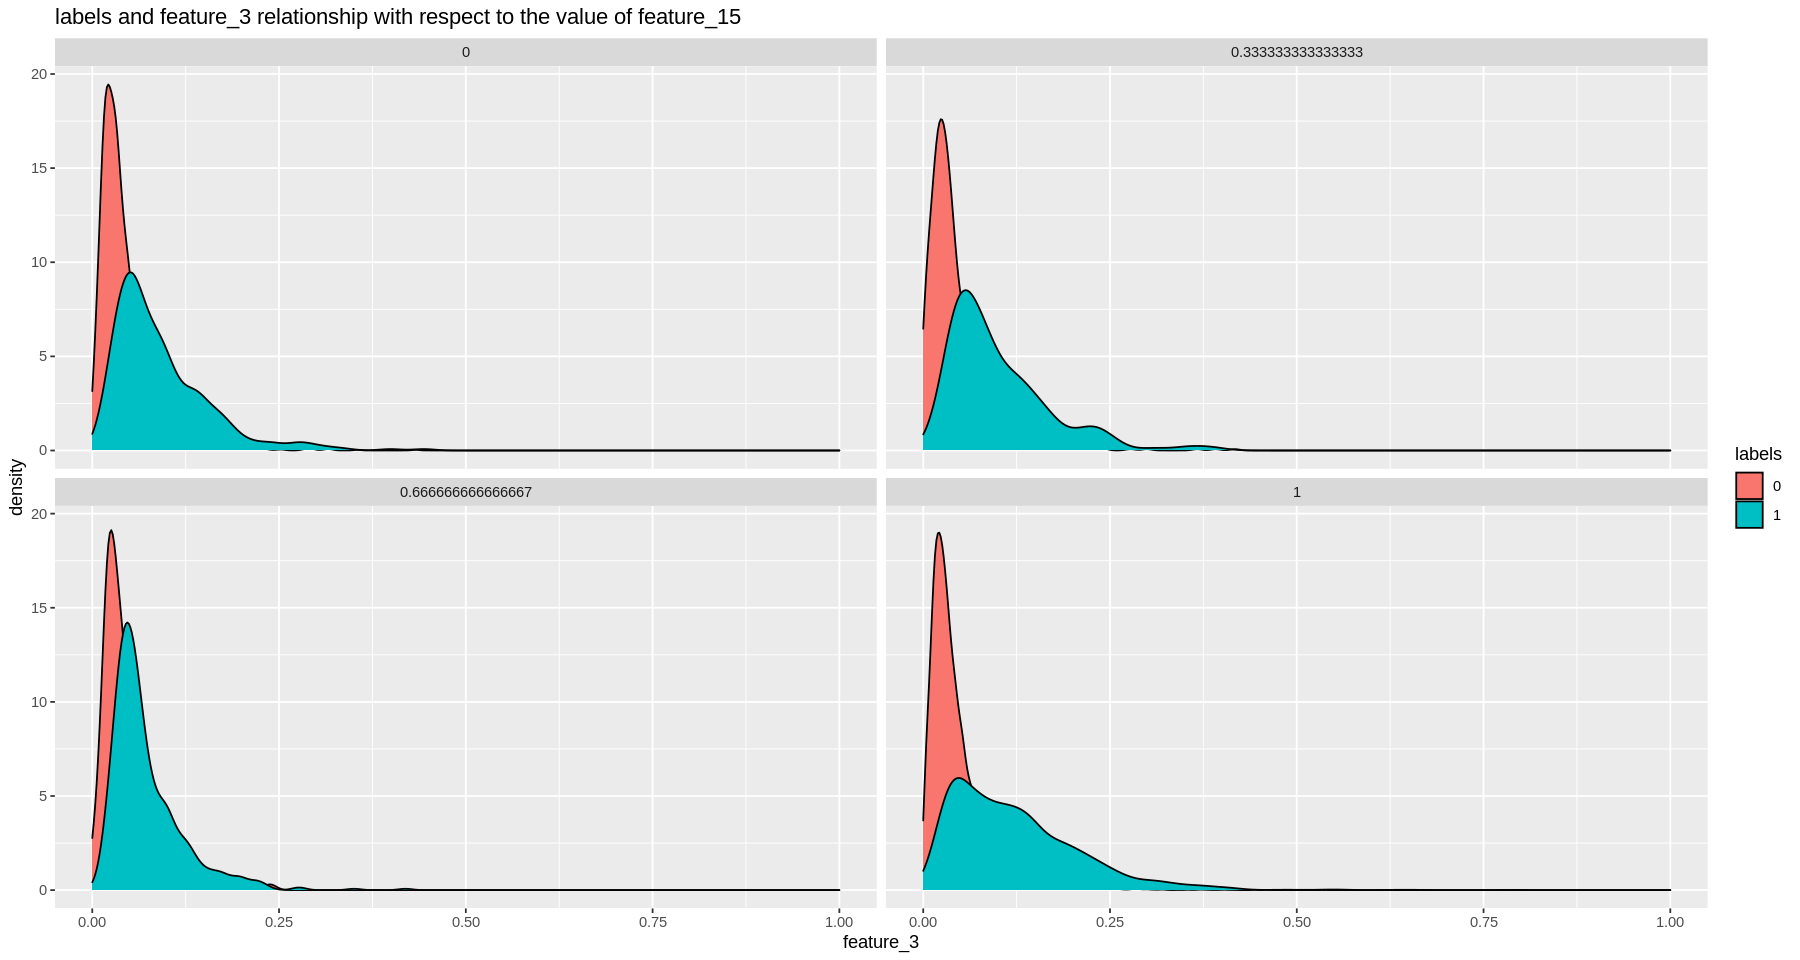

In [39]:
# Feature_3 is highlighted here as it has better relationship with labels
ggplot(aes(x=feature_3),data =insurance) + geom_density(aes(fill = labels)) +
    facet_wrap(~feature_15) +
    ggtitle('Density of feature_3 with respect to feature_15 and labels')

* From the above plot, there doesn't seem to be any specific seprability of labels considering data for feature_3 and feature_15. 
* However value 0 of labels tends to exhibit a higher feature_3 value density than value 1 of labels for all the values of feature_15. 
* Value 1 of labels tends to exhibit a spreader distribution of feature_3 value than value 1 of labels for all the values of feature_15.
* The feature_15 value of .667 exhibits a narrower spread for feature_3 value between 0 and 0.25 compared to other feature_15 values.

### 2.3.2: Multivariate EDA : Feature_3 data spreading for each labels and for each value of feature_13.

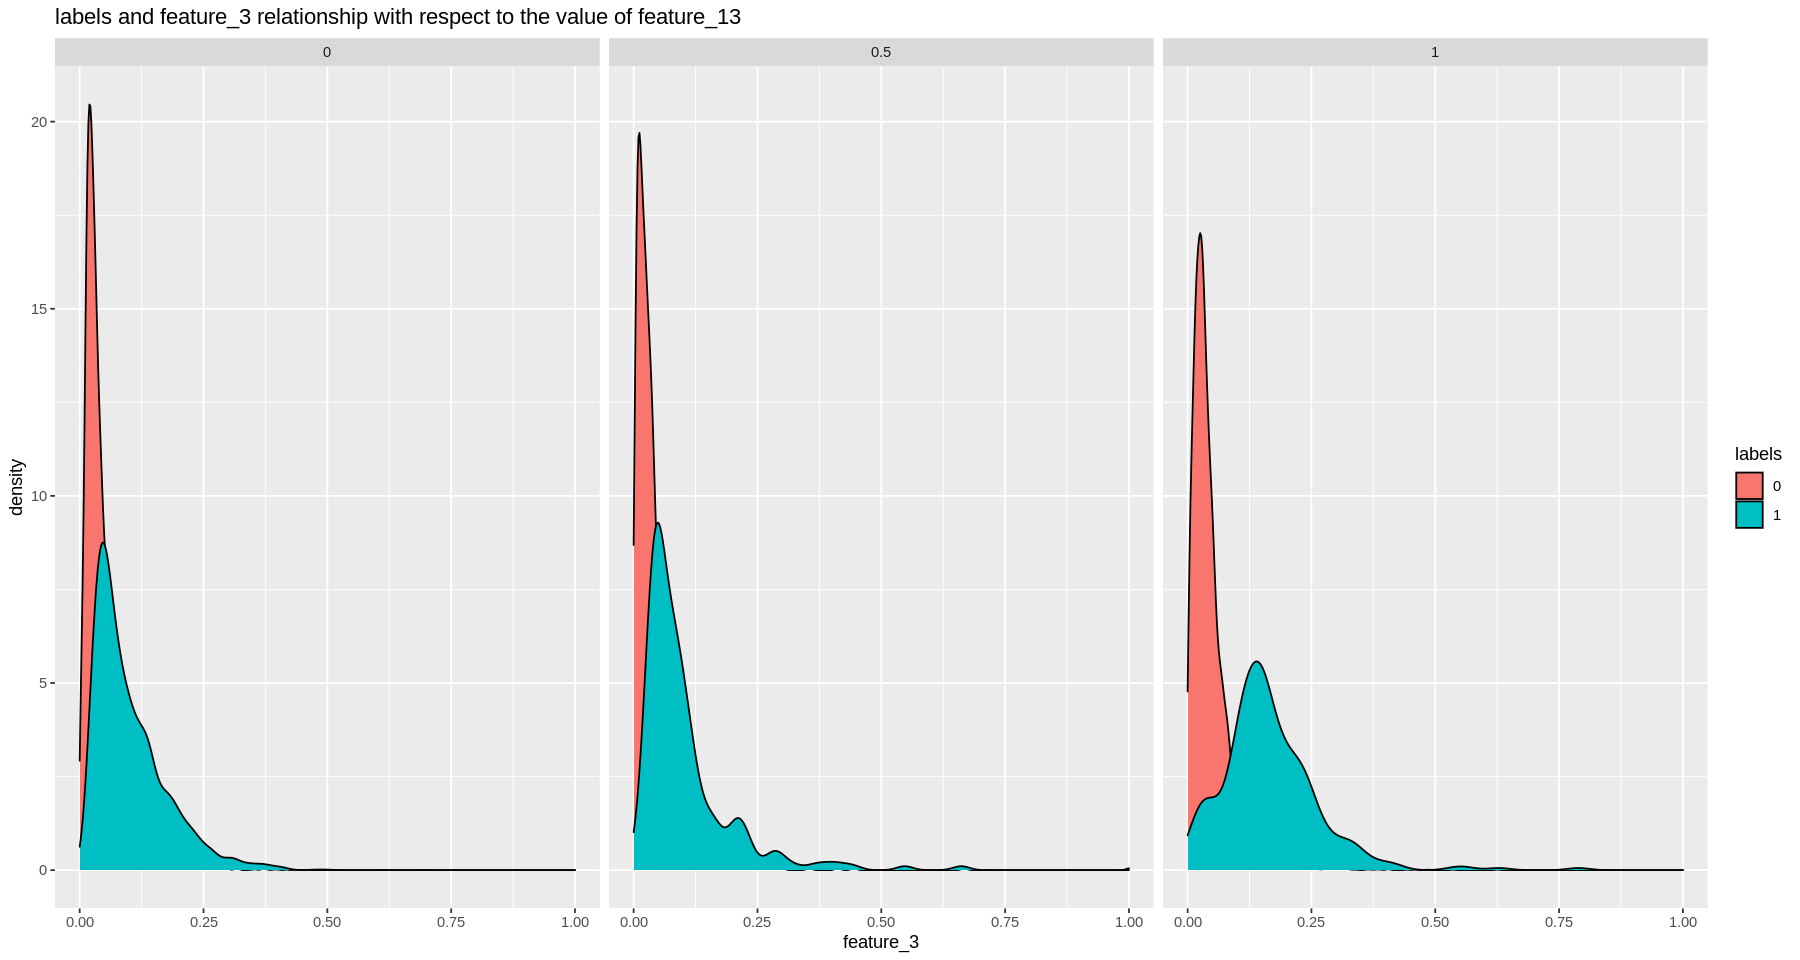

In [40]:

ggplot(aes(x=feature_3),data =insurance) + geom_density(aes(fill = labels)) +
    facet_wrap(~feature_13) +
    ggtitle('Density of feature_3 with respect to feature_13 and labels')

* From the above analysis plot,feature_3 shows more independence for each labels for higher value (when value is 1) of feature_13.
* However value 0 of labels tends to exhibit a higher feature_3 value density than value 1 of labels for all the values of feature_13. 
* Value 1 of labels tends to exhibit a spreader distribution of feature_3 value than value 1 of labels for all the values of feature_13.

### 2.3.3 : feature_3 values relationship with discrete variables by labels

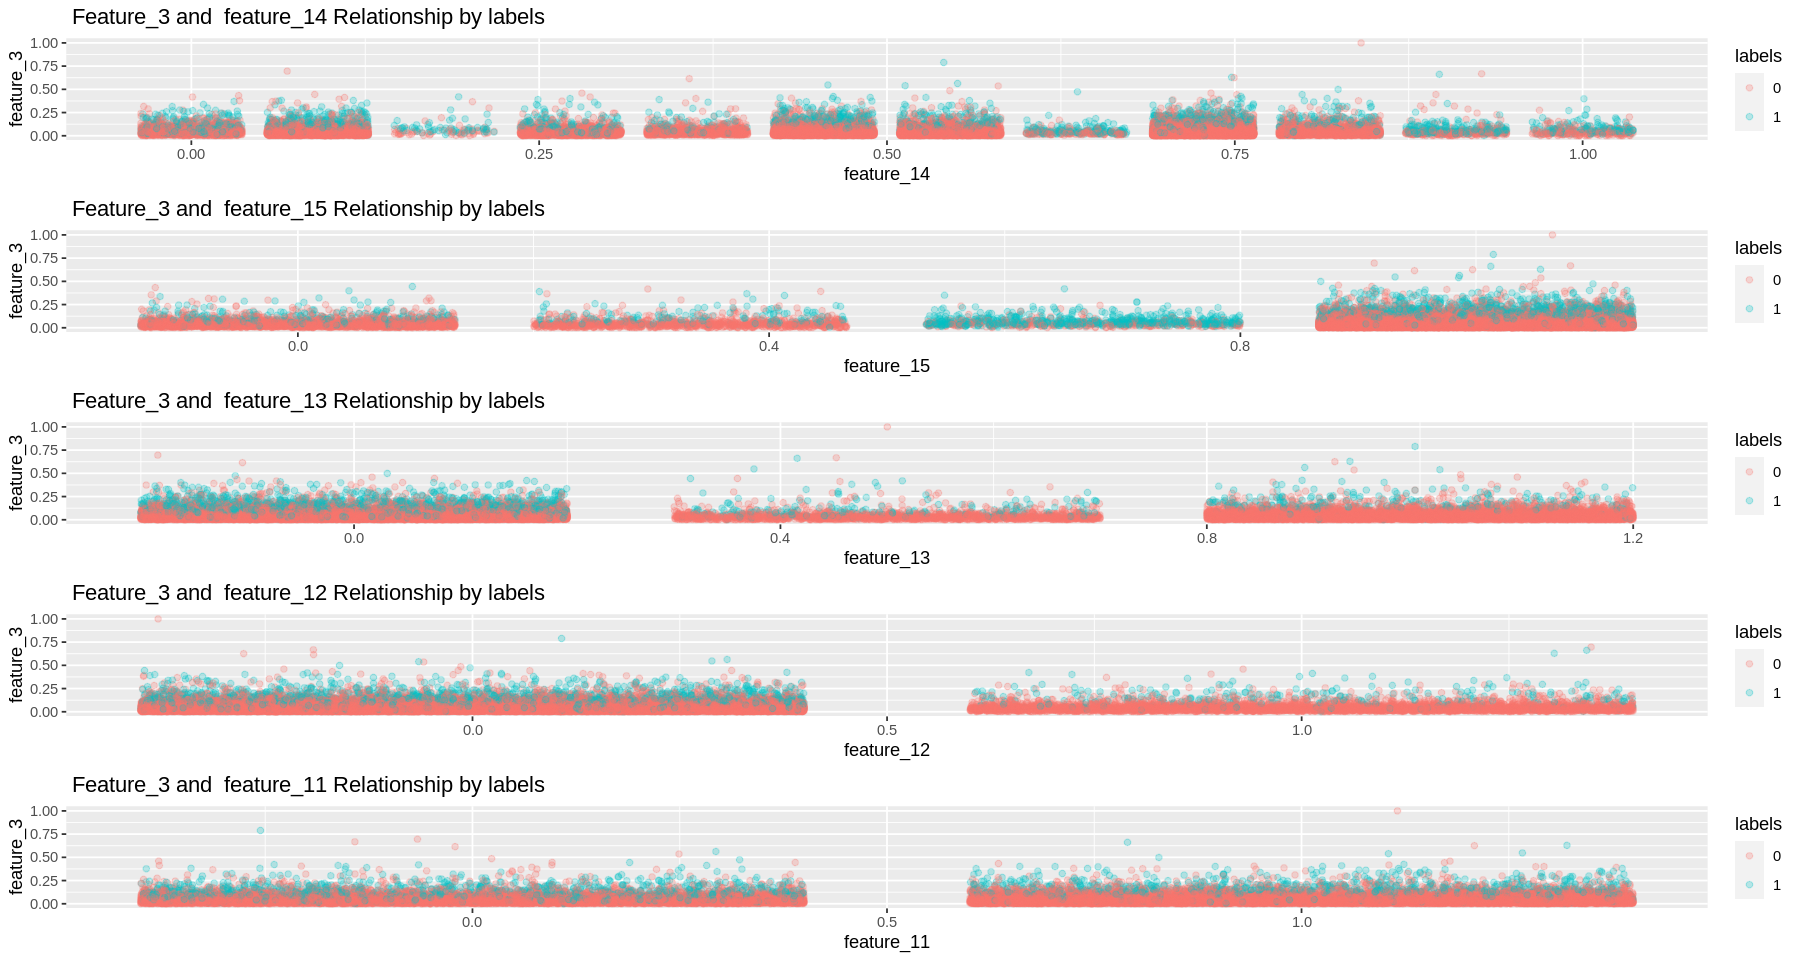

In [41]:
t1=ggplot(aes(x = feature_14, y = feature_3), data = insurance) + 
    geom_point(aes(color=labels),alpha=1/4, position = 'jitter') +
    ggtitle(' Feature_3 and  feature_14 Relationship by labels')
t2= ggplot(aes(x = feature_15, y = feature_3), data = insurance) + 
    geom_point(aes(color=labels),alpha=1/4, position = 'jitter') +
    ggtitle(' Feature_3 and  feature_15 Relationship by labels')
t3 = ggplot(aes(x = feature_13, y = feature_3), data = insurance) + 
    geom_point(aes(color=labels),alpha=1/4, position = 'jitter') +
    ggtitle(' Feature_3 and  feature_13 Relationship by labels')
t4= ggplot(aes(x = feature_12, y = feature_3), data = insurance) + 
    geom_point(aes(color=labels),alpha=1/4, position = 'jitter') +
    ggtitle(' Feature_3 and  feature_12 Relationship by labels')
t5= ggplot(aes(x = feature_11, y = feature_3), data = insurance) + 
    geom_point(aes(color=labels),alpha=1/4, position = 'jitter') +
    ggtitle(' Feature_3 and  feature_11 Relationship by labels')

grid.arrange( t1,t2,t3,t4,t5, ncol = 1)

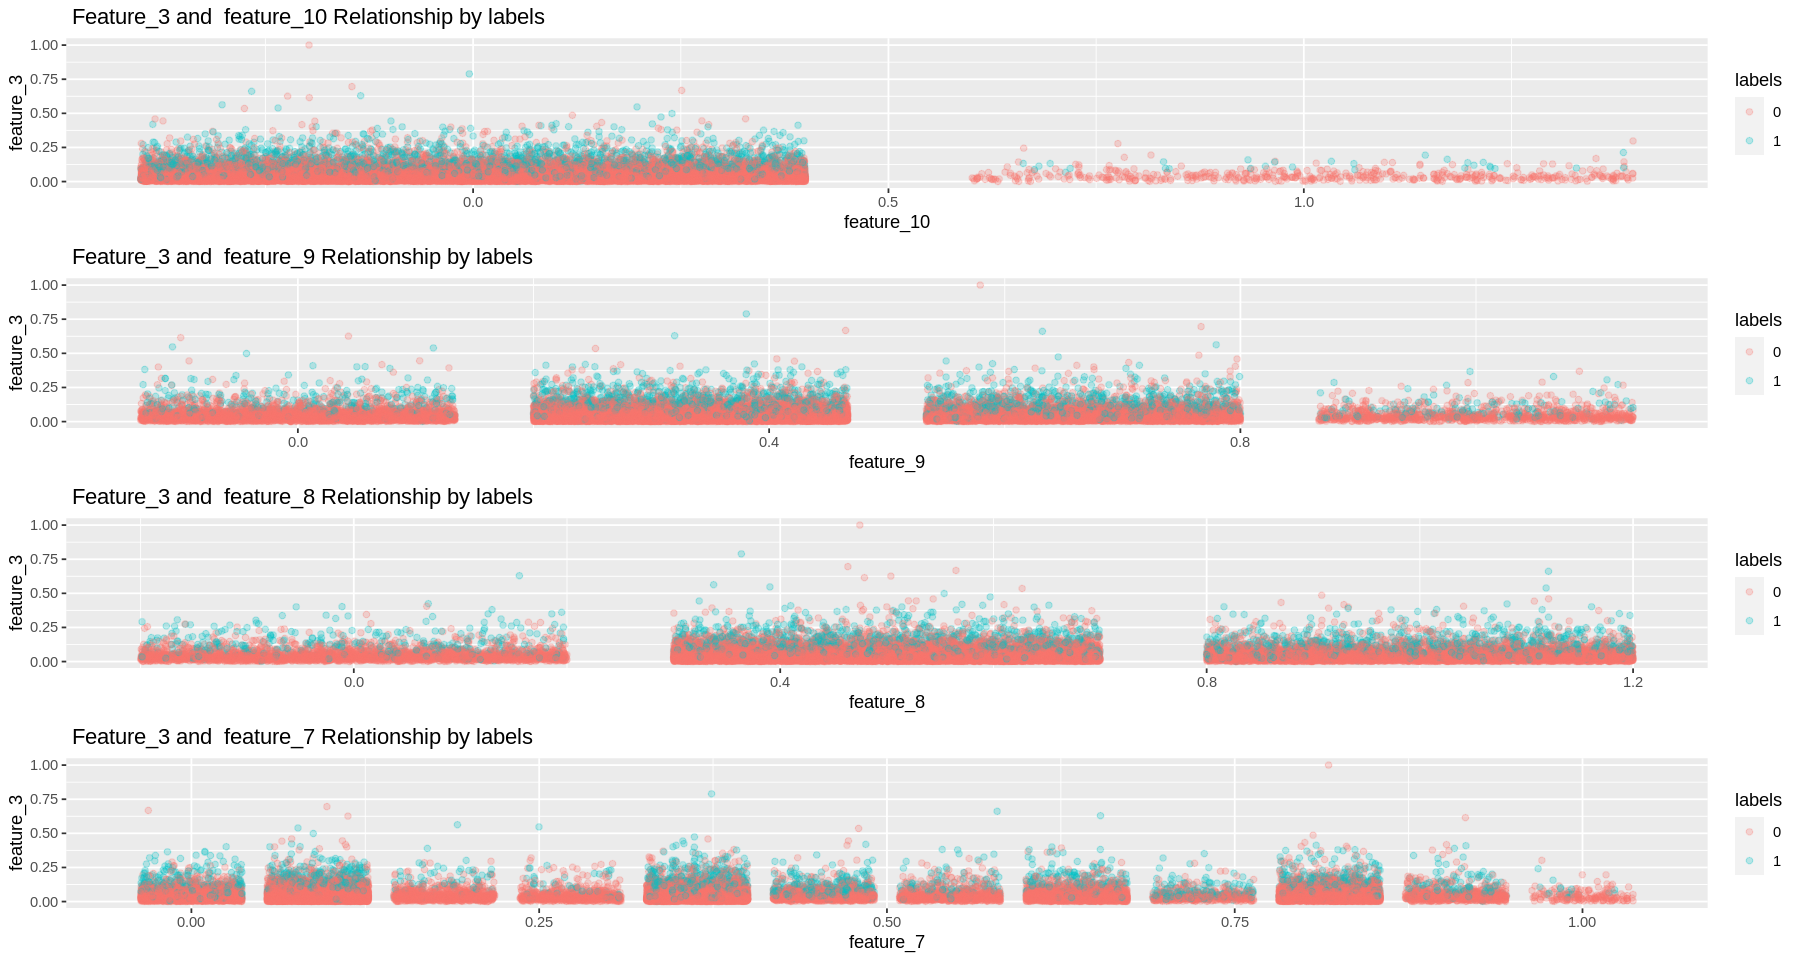

In [42]:
t6 =ggplot(aes(x = feature_10, y = feature_3), data = insurance) + 
    geom_point(aes(color=labels),alpha=1/4, position = 'jitter') +
    ggtitle(' Feature_3 and  feature_10 Relationship by labels')
t7= ggplot(aes(x = feature_9, y = feature_3), data = insurance) + 
    geom_point(aes(color=labels),alpha=1/4, position = 'jitter') +
    ggtitle(' Feature_3 and  feature_9 Relationship by labels')
t8= ggplot(aes(x = feature_8, y = feature_3), data = insurance) + 
    geom_point(aes(color=labels),alpha=1/4, position = 'jitter') +
    ggtitle(' Feature_3 and  feature_8 Relationship by labels')
t9= ggplot(aes(x = feature_7, y = feature_3), data = insurance) + 
    geom_point(aes(color=labels),alpha=1/4, position = 'jitter') +
    ggtitle(' Feature_3 and  feature_7 Relationship by labels')

grid.arrange( t6,t7,t8,t9, ncol = 1)

All the plots indicate that for the same values, label 1 has higher feature_3 than the label 0 on average across all the feature values.


### 2.3.4: Feature_3 and feature_5 relationship for each value of feature_11 by labels 

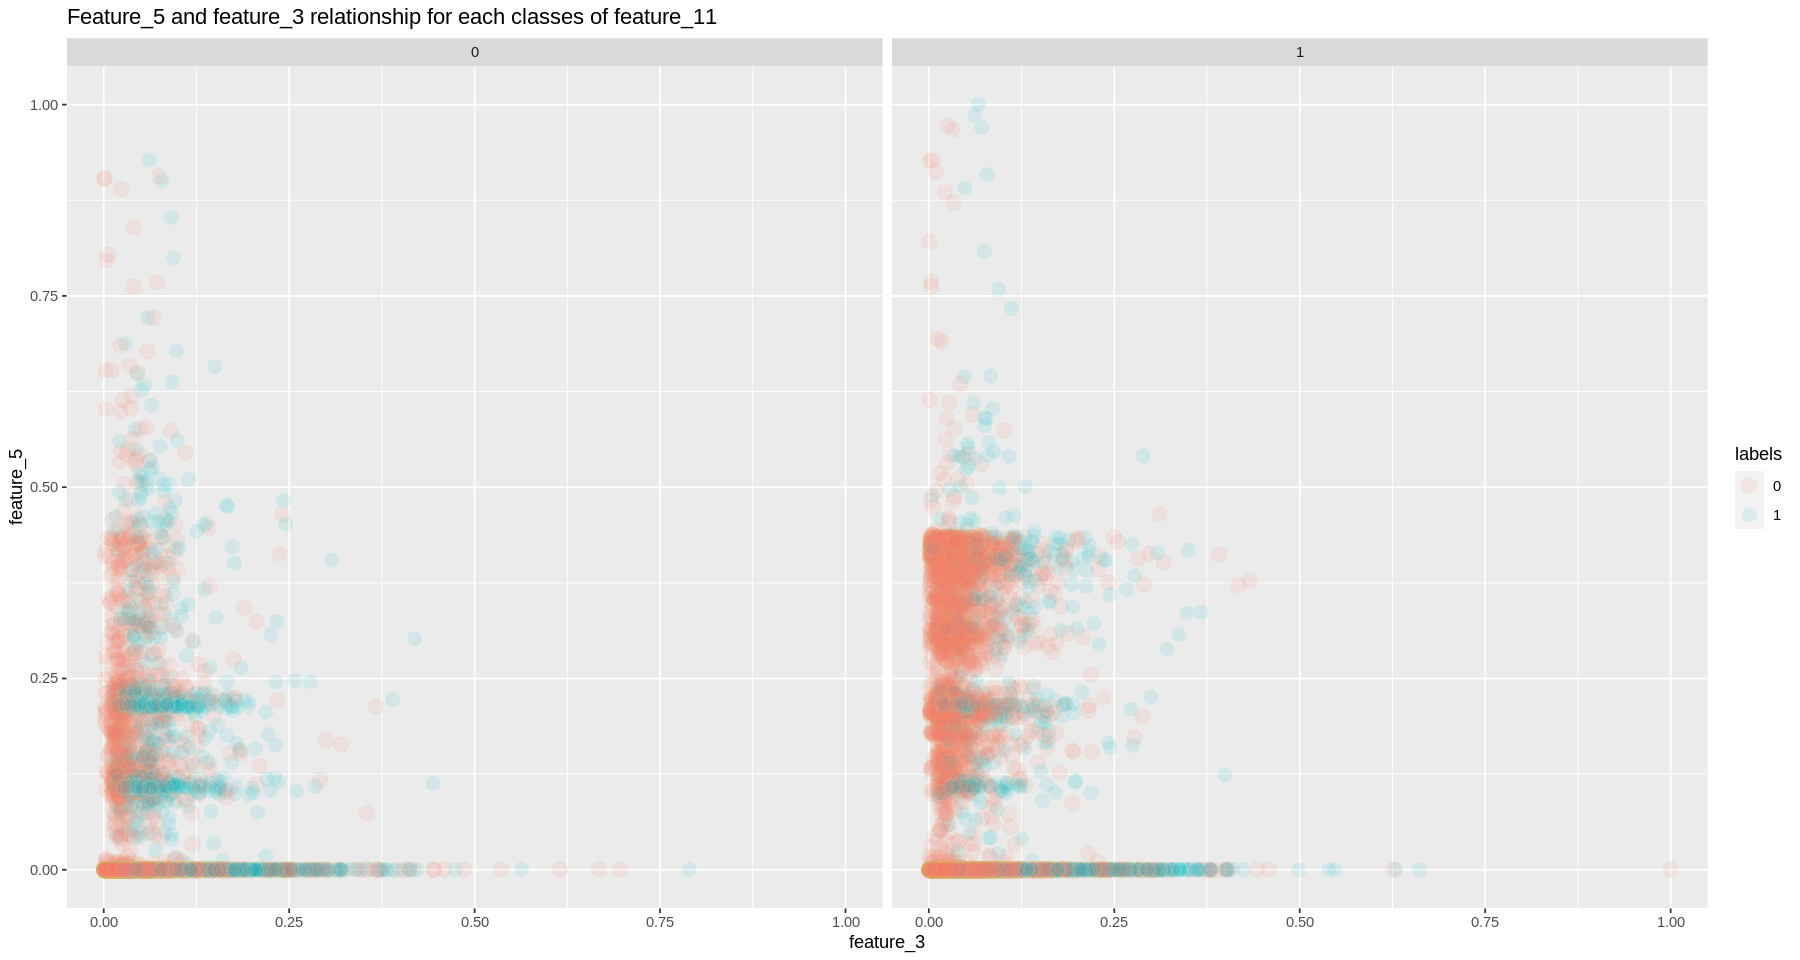

In [100]:
ggplot(aes(x=feature_3, y=feature_5),data = insurance) + 
    geom_jitter(aes(color = labels, bg = labels), alpha=1/10,,pch=21, cex=4) +
    facet_wrap(~feature_11) +
    scale_color_brewer(type = 'div') +
    ggtitle('Feature_5 and feature_3 relationship for each classes of feature_11')

* feature_3 value is higher for feature_5 when label is 1 for any value of feature_11.
* For label 0, feature_5 values are in higher ranges when feature_11 value is 1 


<div class="alert alert-block alert-warning">

### 2.4. Summary <a class="anchor" name="Summary"></a>

* The dataset is heavily biased to the value of 0 of labels.
* Feature_13 and feature_11 varies relatively more as they possess higher standard deviation.
* Only feature_5 and feature_15 has strong correlations.
* Feature_3 has the highest correlation with labels which is a moderate and positive correlation.
* Labels are weakly correlated to feature_5, feature_6, feature_11, feature_13 and feature_15.
* Data are not quite separatable by each labels for all variables.
* In case of multivariate analysis, feature_3 shows more independence among each labels only for higher value of feature_13.  
* For records with the value of 1 for labels, the feature_3 value is higher than that of labels with 0 across all the values of feature_14 and feature_15

<div class="alert alert-block alert-success">

<br>
    
## 3. **Model Development** <a class="anchor" name="MD">
    
<br>
    
</a>

As we see from the exploratory data analysis, the classes (labels) are not quite separate across the data for almost all the variables. So a simple linear regression will not be sufficient to get an effective model for this classification task. Rather, logistic regression and KNN has been chosed as the classifier. 

## 3.1 Build a multiple logistic regression model to predict the customer churn

In [369]:
sample_size = floor(0.8*nrow(insurance))
set.seed(777)
# randomly split data in r
picked = sample(seq_len(nrow(insurance)),size = sample_size)
train =insurance[picked,]
valid =insurance[-picked,]
labels_valid=valid$labels

### 3.1.1 : Logistic Model-1: Considering all features

In [370]:
fit.glm_1 = glm(labels ~ ., data = train, family = binomial)

In [371]:
summary(fit.glm_1)


Call:
glm(formula = labels ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.5972  -0.4461  -0.2856  -0.1644   3.1657  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.21347    0.19644 -21.449  < 2e-16 ***
feature_0    0.49272    0.18788   2.623  0.00873 ** 
feature_1    1.10929    0.64321   1.725  0.08460 .  
feature_2   -0.17919    0.09045  -1.981  0.04757 *  
feature_3   19.32125    0.43323  44.598  < 2e-16 ***
feature_4   -8.49653    0.91457  -9.290  < 2e-16 ***
feature_5    3.08701    0.31479   9.807  < 2e-16 ***
feature_6    6.07997    0.65284   9.313  < 2e-16 ***
feature_7    0.05037    0.08580   0.587  0.55715    
feature_8    0.44632    0.09064   4.924 8.48e-07 ***
feature_9    0.66573    0.10061   6.617 3.68e-11 ***
feature_10  -0.59963    0.26388  -2.272  0.02307 *  
feature_11  -1.01122    0.05517 -18.328  < 2e-16 ***
feature_12  -0.67303    0.08179  -8.228  < 2e-16 ***
feature_13

In [372]:
probs <- predict(fit.glm_1, valid, type = "response")
pred.glm_1 <- rep(0, length(probs))
pred.glm_1[probs >0.5] <- 1
confusionMatrix(table(pred.glm_1, labels_valid), labels = 1)

Confusion Matrix and Statistics

          labels_valid
pred.glm_1    0    1
         0 4647  550
         1  100  129
                                          
               Accuracy : 0.8802          
                 95% CI : (0.8713, 0.8887)
    No Information Rate : 0.8749          
    P-Value [Acc > NIR] : 0.1207          
                                          
                  Kappa : 0.2359          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9789          
            Specificity : 0.1900          
         Pos Pred Value : 0.8942          
         Neg Pred Value : 0.5633          
             Prevalence : 0.8749          
         Detection Rate : 0.8564          
   Detection Prevalence : 0.9578          
      Balanced Accuracy : 0.5845          
                                          
       'Positive' Class : 0               
                     

In [373]:
anova(fit.glm_1, test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,21699,15517.57,NA
feature_0,1,5.810150,21698,15511.76,1.593393e-02
feature_1,1,33.543662,21697,15478.22,6.968208e-09
feature_2,1,19.330654,21696,15458.89,1.099273e-05
feature_3,1,2438.272910,21695,13020.61,0.000000e+00
feature_4,1,139.623466,21694,12880.99,3.217761e-32
feature_5,1,208.383974,21693,12672.61,3.093451e-47
feature_6,1,84.543068,21692,12588.06,3.759359e-20
feature_7,1,35.410303,21691,12552.65,2.670703e-09


So, feature_0, feature_1, feature_2, feature_10,feature_14 can be removed from the model as the drop of deviance is relatively small (<35).

### 3.1.2 : Logistic Model-2: Removing five features from the model based on drop in deviance.

In [374]:
fit.glm_2 = glm(labels ~ .-feature_0-feature_1-feature_2-feature_10-feature_14, data = train, family = binomial)

In [375]:
summary(fit.glm_2)


Call:
glm(formula = labels ~ . - feature_0 - feature_1 - feature_2 - 
    feature_10 - feature_14, family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.5425  -0.4500  -0.2865  -0.1654   3.2156  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.73492    0.15017 -24.871  < 2e-16 ***
feature_3   19.33326    0.43280  44.670  < 2e-16 ***
feature_4   -9.28430    0.90753 -10.230  < 2e-16 ***
feature_5    3.12046    0.31434   9.927  < 2e-16 ***
feature_6    6.19607    0.65497   9.460  < 2e-16 ***
feature_7    0.03599    0.08536   0.422    0.673    
feature_8    0.34419    0.08088   4.255 2.09e-05 ***
feature_9    0.65190    0.10028   6.501 8.00e-11 ***
feature_11  -1.01118    0.05345 -18.917  < 2e-16 ***
feature_12  -0.69507    0.08119  -8.561  < 2e-16 ***
feature_13  -1.22277    0.07697 -15.886  < 2e-16 ***
feature_15   0.74782    0.12798   5.843 5.12e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0

In [376]:
probs <- predict(fit.glm_2, valid, type = "response")
pred.glm_2 <- rep(0, length(probs))
pred.glm_2[probs >0.5] <- 1
confusionMatrix(table(pred.glm_2, labels_valid), labels = 1)

Confusion Matrix and Statistics

          labels_valid
pred.glm_2    0    1
         0 4654  558
         1   93  121
                                          
               Accuracy : 0.88            
                 95% CI : (0.8711, 0.8886)
    No Information Rate : 0.8749          
    P-Value [Acc > NIR] : 0.1293          
                                          
                  Kappa : 0.2245          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9804          
            Specificity : 0.1782          
         Pos Pred Value : 0.8929          
         Neg Pred Value : 0.5654          
             Prevalence : 0.8749          
         Detection Rate : 0.8577          
   Detection Prevalence : 0.9606          
      Balanced Accuracy : 0.5793          
                                          
       'Positive' Class : 0               
                     

* So, model accuracy remains same and precision decreased slightly. Model complexity is reduced significantly.

We know that a bigger Z static(both positive and negative) indicates that the corresponding true regression coefficient is not 0 and the corresponding X-variable matters. So, here, we can remove the feature_7 and feature_8 as they showed relatively small z value(-5>Z>5) from the model

### 3.1.3: Logistic Model-3: Removing 2 more features (taking 9 features in model) from the model based on Z static

In [377]:
fit.glm_3 = glm(labels ~ .-feature_0-feature_1-feature_2-feature_7-feature_8-feature_10-feature_14, data = train, family = binomial)

In [378]:
summary(fit.glm_3)


Call:
glm(formula = labels ~ . - feature_0 - feature_1 - feature_2 - 
    feature_7 - feature_8 - feature_10 - feature_14, family = binomial, 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.5424  -0.4513  -0.2885  -0.1658   3.1677  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.53293    0.13992 -25.249  < 2e-16 ***
feature_3   19.29828    0.43226  44.645  < 2e-16 ***
feature_4   -9.40972    0.90931 -10.348  < 2e-16 ***
feature_5    3.12930    0.31453   9.949  < 2e-16 ***
feature_6    6.24633    0.65151   9.588  < 2e-16 ***
feature_9    0.70477    0.09872   7.139 9.39e-13 ***
feature_11  -1.01429    0.05313 -19.092  < 2e-16 ***
feature_12  -0.70364    0.08107  -8.680  < 2e-16 ***
feature_13  -1.23310    0.07683 -16.050  < 2e-16 ***
feature_15   0.75495    0.12794   5.901 3.62e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)



In [379]:
probs <- predict(fit.glm_3, valid, type = "response")
pred.glm_3 <- rep(0, length(probs))
pred.glm_3[probs >0.5] <- 1
confusionMatrix(table(pred.glm_3, labels_valid), labels = 1)

Confusion Matrix and Statistics

          labels_valid
pred.glm_3    0    1
         0 4652  556
         1   95  123
                                          
               Accuracy : 0.88            
                 95% CI : (0.8711, 0.8886)
    No Information Rate : 0.8749          
    P-Value [Acc > NIR] : 0.1293          
                                          
                  Kappa : 0.2272          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9800          
            Specificity : 0.1811          
         Pos Pred Value : 0.8932          
         Neg Pred Value : 0.5642          
             Prevalence : 0.8749          
         Detection Rate : 0.8574          
   Detection Prevalence : 0.9598          
      Balanced Accuracy : 0.5806          
                                          
       'Positive' Class : 0               
                     

In [380]:
with(fit.glm_3, pchisq(null.deviance - deviance, df.null - df.residual, lower.tail = FALSE))

[1] 0

* Model performance did not change at all. The number of model predictors are decreased. The model varies significantly than null model.

### 3.1.4: Logistic Model 4: Considering features  only selected by EDA (choosing 6 variables) in Model development

From EDA, we see that feature_3,feature_5,feature_6,feature_11, feature_13, feature_15 have better correlations with labels

In [381]:
set.seed(3)
fit.glm_4 = glm(labels ~ feature_3 +feature_5+feature_6+feature_11+feature_13+ feature_15 , data = train, family = binomial)

In [382]:
summary(fit.glm_4)


Call:
glm(formula = labels ~ feature_3 + feature_5 + feature_6 + feature_11 + 
    feature_13 + feature_15, family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.4136  -0.4503  -0.3003  -0.1802   3.0707  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.38483    0.13007 -26.023  < 2e-16 ***
feature_3   19.06929    0.42367  45.009  < 2e-16 ***
feature_5    3.18494    0.31491  10.114  < 2e-16 ***
feature_6    5.75505    0.63756   9.027  < 2e-16 ***
feature_11  -1.05011    0.05268 -19.933  < 2e-16 ***
feature_13  -1.23905    0.07642 -16.214  < 2e-16 ***
feature_15   0.63870    0.12792   4.993 5.95e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 15518  on 21699  degrees of freedom
Residual deviance: 11816  on 21693  degrees of freedom
AIC: 11830

Number of Fisher Scoring iterations: 6


In [383]:
probs <- predict(fit.glm_4, valid, type = "response")
pred.glm_4 <- rep(0, length(probs))
pred.glm_4[probs >0.5] <- 1
confusionMatrix(table(pred.glm_4, labels_valid), labels = 1)

Confusion Matrix and Statistics

          labels_valid
pred.glm_4    0    1
         0 4664  565
         1   83  114
                                          
               Accuracy : 0.8806          
                 95% CI : (0.8716, 0.8891)
    No Information Rate : 0.8749          
    P-Value [Acc > NIR] : 0.1048          
                                          
                  Kappa : 0.2162          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9825          
            Specificity : 0.1679          
         Pos Pred Value : 0.8919          
         Neg Pred Value : 0.5787          
             Prevalence : 0.8749          
         Detection Rate : 0.8596          
   Detection Prevalence : 0.9637          
      Balanced Accuracy : 0.5752          
                                          
       'Positive' Class : 0               
                     

* Though the model accuracy remains almost same,precision is reduced significantly.
* Considering the above 4 logistic models, model-3 is preferable as it has 9 predictors and model accuracy and precision is almost same to that of model-1. 

### 3.1.5: Crosschecking model performance using whole training data set

In [384]:
insurance.labels<-insurance$labels
probs <- predict(fit.glm_3, insurance, type = "response")
pred.glm_final <- rep(0, length(probs))
pred.glm_final[probs >0.5] <- 1
confusionMatrix(table(pred.glm_final, insurance.labels), labels = 1)

Confusion Matrix and Statistics

              insurance.labels
pred.glm_final     0     1
             0 23472  2530
             1   472   652
                                         
               Accuracy : 0.8893         
                 95% CI : (0.8855, 0.893)
    No Information Rate : 0.8827         
    P-Value [Acc > NIR] : 0.0003215      
                                         
                  Kappa : 0.2574         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9803         
            Specificity : 0.2049         
         Pos Pred Value : 0.9027         
         Neg Pred Value : 0.5801         
             Prevalence : 0.8827         
         Detection Rate : 0.8653         
   Detection Prevalence : 0.9586         
      Balanced Accuracy : 0.5926         
                                         
       'Positive' Class : 0              
               

* So, after predicitng on full training set, model performance (accuracy and specificity) has been increased. 

* So chosen logistic model performance is quite consistent among validation and whole training data set.

# 3.2: Model Build-up Using KNN Classifier:

### 3.2.1: KNN Model-1 Considering all features for the model

In [349]:
library(class)

In [385]:
train.labels <- train$labels
valid.labels <- valid$labels

In [386]:
set.seed (1)
knn.pred1 <- knn(train, valid, train.labels , k = 3)
confusionMatrix(table(knn.pred1, valid.labels), labels = 1)

Confusion Matrix and Statistics

         valid.labels
knn.pred1    0    1
        0 4747    0
        1    0  679
                                     
               Accuracy : 1          
                 95% CI : (0.9993, 1)
    No Information Rate : 0.8749     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.8749     
         Detection Rate : 0.8749     
   Detection Prevalence : 0.8749     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

In [352]:
i=1
k.optm=1
for (i in 1:20){
 knn.mod <- knn(train,valid,train.labels, k=i)
 k.optm[i] <- 100 * sum(valid.labels == knn.mod)/NROW(valid.labels)
 k=i
 cat('for K ',k,':',k.optm[i],';')
}

for K  1 : 100 ;for K  2 : 99.97051 ;for K  3 : 99.98525 ;for K  4 : 99.98525 ;for K  5 : 99.98525 ;for K  6 : 99.99263 ;for K  7 : 100 ;for K  8 : 100 ;for K  9 : 99.97788 ;for K  10 : 99.98525 ;for K  11 : 99.97051 ;for K  12 : 99.97051 ;for K  13 : 99.97051 ;for K  14 : 99.96313 ;for K  15 : 99.96313 ;for K  16 : 99.96313 ;for K  17 : 99.97051 ;for K  18 : 99.94839 ;for K  19 : 99.94839 ;for K  20 : 99.94102 ;


The model is overfitted. So, further tuning of the parameters is impossible. In that case, reducing features in the model is one way to overcome the overfitting problem.

### 3.2.2: KNN Model-2 Considering only the features which are considered most important in the logistic model:

In [387]:
train.x <- train[,c("feature_3","feature_4","feature_5","feature_6","feature_9","feature_11","feature_12","feature_13","feature_15")]
valid.x <- valid[,c("feature_3","feature_4","feature_5","feature_6","feature_9","feature_11","feature_12","feature_13","feature_15")]

In [388]:
set.seed (1)
knn.pred2 <- knn(train.x, valid.x, train.labels , k = 3)
confusionMatrix(table(knn.pred2, valid.labels), labels = 1)

Confusion Matrix and Statistics

         valid.labels
knn.pred2    0    1
        0 4495  434
        1  252  245
                                          
               Accuracy : 0.8736          
                 95% CI : (0.8644, 0.8823)
    No Information Rate : 0.8749          
    P-Value [Acc > NIR] : 0.6226          
                                          
                  Kappa : 0.3477          
                                          
 Mcnemar's Test P-Value : 4.826e-12       
                                          
            Sensitivity : 0.9469          
            Specificity : 0.3608          
         Pos Pred Value : 0.9119          
         Neg Pred Value : 0.4930          
             Prevalence : 0.8749          
         Detection Rate : 0.8284          
   Detection Prevalence : 0.9084          
      Balanced Accuracy : 0.6539          
                                          
       'Positive' Class : 0               
                         

In [355]:
i=1
k.optm=1
for (i in 1:20){
 knn.mod <- knn(train.x,valid.x,train.labels, k=i)
 k.optm[i] <- 100 * sum(valid.labels == knn.mod)/NROW(valid.labels)
 k=i
 cat('for K ',k,':',k.optm[i],';')
}

for K  1 : 85.84384 ;for K  2 : 85.98393 ;for K  3 : 88.18845 ;for K  4 : 88.16633 ;for K  5 : 88.87414 ;for K  6 : 88.73406 ;for K  7 : 89.30915 ;for K  8 : 89.36813 ;for K  9 : 89.46398 ;for K  10 : 89.44924 ;for K  11 : 89.51559 ;for K  12 : 89.50085 ;for K  13 : 89.57458 ;for K  14 : 89.47136 ;for K  15 : 89.47136 ;for K  16 : 89.58195 ;for K  17 : 89.405 ;for K  18 : 89.46398 ;for K  19 : 89.49347 ;for K  20 : 89.44924 ;

* In this case, we can select K=10.
* Comparing both models of KNN, based on validation set method, model1 performs far better than model2. Model-2 performance is almost similar to the performance of chosen logistic model in terms of accuracy. However, precision is better.
* p-value of model-2 is also very high.
* However, the variation in model accuracy and higher p-value might be the result of how the data is splitted. So, use of another validation technique for cross checking is important.  

In [357]:
set.seed(33)
trctrl <- trainControl(method = "cv", number = 10, savePredictions=TRUE)
fit_allfeature <- train(factor(labels) ~., data = valid, method = "knn", trControl=trctrl, tuneLength = 0)
fit_allfeature 

k-Nearest Neighbors 

13563 samples
   16 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 12206, 12207, 12207, 12207, 12206, 12207, ... 
Resampling results:

  Accuracy   Kappa   
  0.8855714  0.216452

Tuning parameter 'k' was held constant at a value of 5

In [358]:
set.seed(33)
fit_selectedfeature <- train(factor(labels) ~. - feature_0 - feature_1 - feature_2 - 
    feature_7 - feature_8 - feature_10 - feature_14, data = valid, method = "knn", trControl=trctrl, tuneLength = 0)
fit_selectedfeature 

k-Nearest Neighbors 

13563 samples
   16 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 12206, 12207, 12207, 12207, 12206, 12207, ... 
Resampling results:

  Accuracy   Kappa    
  0.8883729  0.3684264

Tuning parameter 'k' was held constant at a value of 5

* Now, it is clear that model-2 is not that much worse. However, p-value of model-2 is very high. So model-1 is selected for further investigation

### 3.2.3: Crosschecking KNN model performance using whole training data set

In [399]:
set.seed (1)
knn.pred0 <- knn(train, insurance, train.labels , k = 10)
confusionMatrix(table(knn.pred0, insurance.labels), labels = 1)

Confusion Matrix and Statistics

         insurance.labels
knn.pred0     0     1
        0 23944     0
        1     0  3182
                                     
               Accuracy : 1          
                 95% CI : (0.9999, 1)
    No Information Rate : 0.8827     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.8827     
         Detection Rate : 0.8827     
   Detection Prevalence : 0.8827     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

<div class="alert alert-block alert-success">

<br>
    
## 4. **Model Scoring on Test Data** <a class="anchor" name="MScore">
    
<br>
    
</a>

### 4.1 : Model Scoring on Test Data for Logistic Model

### 4.1.1 : Using Validation Data Set Method

In [361]:
test.labels <- testset$labels

In [409]:
probs <- predict(fit.glm_3, testset, type = "response")
pred.glm_test <- rep(0, length(probs))
pred.glm_test[probs >0.5] <- 1
confusionMatrix(table(pred.glm_test, test.labels), labels = 1)

Confusion Matrix and Statistics

             test.labels
pred.glm_test    0    1
            0 4244  132
            1 1753  653
                                          
               Accuracy : 0.7221          
                 95% CI : (0.7112, 0.7327)
    No Information Rate : 0.8843          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.2844          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.7077          
            Specificity : 0.8318          
         Pos Pred Value : 0.9698          
         Neg Pred Value : 0.2714          
             Prevalence : 0.8843          
         Detection Rate : 0.6258          
   Detection Prevalence : 0.6452          
      Balanced Accuracy : 0.7698          
                                          
       'Positive' Class : 0               
          

* So accuracy of the model decreased from .88 (train data) to .72 (test data) after comparing model performance with test data.
* Model p-value is very high.
* However, precision is unexpectedly very high for test data set. It is increased from .18 (train) to .83 (test) . This is again beacuse of how data was splitted. So result of validation data method is not reliable

### 4.1.2 : Using K-fold Cross-validation Method

In [392]:
set.seed(33)
trctrl <- trainControl(method = "cv", number = 10, savePredictions=TRUE)
fit <- train(factor(labels) ~. - feature_0 - feature_1 - feature_2 - 
    feature_7 - feature_8 - feature_10 - feature_14, data = testset, method = "glm", trControl=trctrl, tuneLength = 0)
fit

Generalized Linear Model 

6782 samples
  16 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 6104, 6104, 6104, 6103, 6104, 6104, ... 
Resampling results:

  Accuracy  Kappa    
  0.892802  0.2810616


In [393]:
pred <- fit$pred
pred$equal <- ifelse(pred$pred == pred$obs, 1,0)
eachfold <- pred %>%                                        
  group_by(Resample) %>%                         
  summarise_at(vars(equal),                     
               list(Accuracy = mean))              
eachfold

Resample,Accuracy
<chr>,<dbl>
Fold01,0.8864307
Fold02,0.8879056
Fold03,0.8952802
Fold04,0.8998527
Fold05,0.8952802
Fold06,0.8864307
Fold07,0.9027982
Fold08,0.8908555
Fold09,0.8879056


* So, K-fold cross validation showed significant improvement in model accuracy

### 4.2 : Model Scoring on Test Data for KNN model  

### 4.2.1 : Based on Validation Data Set

In [400]:
set.seed (1)
knn.test <- knn(train, testset, train.labels , k = 5)
confusionMatrix(table(knn.test, test.labels), labels = 1)

Confusion Matrix and Statistics

        test.labels
knn.test    0    1
       0 5982  237
       1   15  548
                                          
               Accuracy : 0.9628          
                 95% CI : (0.9581, 0.9672)
    No Information Rate : 0.8843          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.793           
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9975          
            Specificity : 0.6981          
         Pos Pred Value : 0.9619          
         Neg Pred Value : 0.9734          
             Prevalence : 0.8843          
         Detection Rate : 0.8820          
   Detection Prevalence : 0.9170          
      Balanced Accuracy : 0.8478          
                                          
       'Positive' Class : 0               
                              

### 4.2.2 : Based on K-fold cross-validation method

In [401]:
set.seed(33)
trctrl <- trainControl(method = "cv", number = 10, savePredictions=TRUE)
fit <- train(factor(labels) ~., data = testset, method = "knn", trControl=trctrl, tuneLength = 0)
fit

k-Nearest Neighbors 

6782 samples
  16 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 6104, 6104, 6104, 6103, 6104, 6104, ... 
Resampling results:

  Accuracy   Kappa    
  0.8925089  0.2652478

Tuning parameter 'k' was held constant at a value of 5

In [396]:
pred <- fit$pred
pred$equal <- ifelse(pred$pred == pred$obs, 1,0)
eachfold <- pred %>%                                        
  group_by(Resample) %>%                         
  summarise_at(vars(equal),                     
               list(Accuracy = mean))              
eachfold

Resample,Accuracy
<chr>,<dbl>
Fold01,0.8952802
Fold02,0.8908555
Fold03,0.8893805
Fold04,0.9086892
Fold05,0.8967552
Fold06,0.8834808
Fold07,0.8807069
Fold08,0.8967552
Fold09,0.8879056


* Validation Set method: 
1. So after implementing KNN model in test data, accuracy falls down from 1 to .96 comparing the performance with train data. That is quite a good performance as accuracy deviation is less than 5%
2. Precision drops dramatically from 1 to .698.


* K-fold Cross Validation Method:

1. Model score is much lower than validation set method. And K-fold cross validation is more reliable validation technique 

**Model Comparison**
* So, both the model performs almost similar way considering accuracy measured by K-fold cross validation technique
- accuracy for logistic regression is .8928
- accuracy for KNN is .8925
* However, logistic regression results a very high p-value.
* In case of predicting churn, logestic model(83%) outperforms the KNN model (70%). However, multinomial logestic model mis-classify more customer who will not churn.
* Let's check computational complexity for both the logistic and KNN model


### 4.3 : Comparing Model runtime

In [324]:
#install.packages('tictoc')
library(tictoc)
tic("time for regression model fitting: ")
fit.glm_3 = glm(labels ~ .-feature_0-feature_1-feature_2-feature_7-feature_8-feature_10-feature_14, data = train, family = binomial)
toc()

time for regression model fitting: : 0.118 sec elapsed


In [325]:
tic("time for KNN model fitting: ")
knn.test <- knn(train, testset, train.labels , k = 5)
toc()

time for KNN model fitting: : 2.68 sec elapsed


* It is clear that KNN model took (2.68/.118) =22 times more time to run the model comparing with logistic model.

### * **So for very large data-set logistic model is an automatic choice as the KNN-model runs very slow.** 

<div class="alert alert-block alert-success">

<br>
    
## 5. **Model Interpretation and Inference**<a class="anchor" name="MInterp">
    
<br>
    
</a>

At first, the summary statistics of the model is interpreted

In [412]:
summary(fit.glm_3)


Call:
glm(formula = labels ~ . - feature_0 - feature_1 - feature_2 - 
    feature_7 - feature_8 - feature_10 - feature_14, family = binomial, 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.5424  -0.4513  -0.2885  -0.1658   3.1677  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.53293    0.13992 -25.249  < 2e-16 ***
feature_3   19.29828    0.43226  44.645  < 2e-16 ***
feature_4   -9.40972    0.90931 -10.348  < 2e-16 ***
feature_5    3.12930    0.31453   9.949  < 2e-16 ***
feature_6    6.24633    0.65151   9.588  < 2e-16 ***
feature_9    0.70477    0.09872   7.139 9.39e-13 ***
feature_11  -1.01429    0.05313 -19.092  < 2e-16 ***
feature_12  -0.70364    0.08107  -8.680  < 2e-16 ***
feature_13  -1.23310    0.07683 -16.050  < 2e-16 ***
feature_15   0.75495    0.12794   5.901 3.62e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)



* The big **z-value** of feature_3 (i.e., either too positive or too negative) indicates that the corresponding true regression coefficient is not 0 and feature_3 really matters in the model. Similarly, importance of feature_15 is lowest as it has lowest absolute Z value.
* **Null deviance** shows how well the response variable is predicted by a model that includes only the intercept. For this particular model Null deviance  is 15518
* **Residual deviance** indicates how well the response variable is predicted with the implemented model.
* **AIC** provides a method for assessing the quality of the selected model through comparison of related models. In this case, the logistic model-1, 2,4 are the related models. We see that AIC for model-1 is 11504. For model-3 , AIC is 11551. But the change is not significant.

Now, let us interprete the model using confusion matrix.

In [415]:
confusionMatrix(table(pred.glm_test, test.labels), labels = 1)

Confusion Matrix and Statistics

             test.labels
pred.glm_test    0    1
            0 4244  132
            1 1753  653
                                          
               Accuracy : 0.7221          
                 95% CI : (0.7112, 0.7327)
    No Information Rate : 0.8843          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.2844          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.7077          
            Specificity : 0.8318          
         Pos Pred Value : 0.9698          
         Neg Pred Value : 0.2714          
             Prevalence : 0.8843          
         Detection Rate : 0.6258          
   Detection Prevalence : 0.6452          
      Balanced Accuracy : 0.7698          
                                          
       'Positive' Class : 0               
          

* NIR(No information rate):  the largest proportion of the observed classes. here it is 0.88. It indicates, how much the target data are imbalanced.
* P-Value [Acc > NIR]: A hypothesis test that computes whether the overall accuracy rate is greater than the rate of the largest class. As the p-value is very high in this case, the overall accuracy rate is lower than the rate of the largest class.
* Sensitivity: the percentage of customers that did not churn are correctly identified. In this KNN model, it is 70.77% 
* Specificity: the percentage of customers that churn are correctly identified, it is 83.18%

The impact of variance has been outperformed by the correlations of the variables. For example: feature_3 standard deviation (.05) is very low, however the z-value for the feature_3 is the highest in the model. The reason is feature_3 has the highest correlations with the target variable (labels). Another reason is high-variance-features have better correlations with other variables as well which reduces the variance effect in the model.

<div class="alert alert-block alert-success">

<br>
    
## 6. **Variable Importance** <a class="anchor" name="VarImp">
    
<br>
    
</a>

At first, let's check the near zero variance predictors, which have the following two characteristics
    1. They have very few unique values relative to the number of samples
    2. the ratio of the frequency of the most common value to the frequency of the second most common value is large
    
This kind of predictor is not only non-informative, it can break some models that we may want to fit to our data. 

the function nearZeroVar from the caret is used to idenfity those near zero variance predictors.

In [252]:
nzv <- nearZeroVar(insurance, saveMetrics = TRUE)
nzv

,freqRatio,percentUnique,zeroVar,nzv
,<dbl>,<dbl>,<lgl>,<lgl>
feature_0,1.044093,0.2838605,FALSE,FALSE
feature_1,18.681818,21.7540367,FALSE,FALSE
feature_2,1.196275,0.1142815,FALSE,FALSE
feature_3,1.086207,5.1721596,FALSE,FALSE
feature_4,1.397929,0.1695790,FALSE,FALSE
feature_5,221.910000,1.8395635,FALSE,TRUE
feature_6,13.092035,0.1290275,FALSE,FALSE
feature_7,1.021819,0.0442380,FALSE,FALSE
feature_8,2.141571,0.0110595,FALSE,FALSE


So no variables is showing near zero variance.

* From EDA, we see that the following features have better correlations with the labels: feature_3,feature_5, feature_6, feature_11, feature_13 and feature_15
* While building logistic regression, we see that combination of few features in the model produced similar accuracy to the model which counted all features. The more important features in the model were: feature_3,feature_4,feature_5,feature_6,feature_9,feature_11,feature_12,feature_13, feature_15
* So all the important features sorted out from EDA is a subset of the features for logistic regression. we get 9 out of 16 features on which we can do further investigation.
* Here, shapleyvalue library is used to measure the importance of the variables in the data.

In [ ]:
#install.packages('ShapleyValue')
library(ShapleyValue)

In [ ]:
y <- insurance1$labels
x <- as.data.frame(insurance1[,c(4:7,10,12:14,16)])
head(x)

feature_3,feature_4,feature_5,feature_6,feature_9,feature_11,feature_12,feature_13,feature_15
2.01858846,0.07622994,-0.4114531,-0.2519404,1,1,0,0,3
-0.15984112,-0.56935064,-0.4114531,-0.2519404,1,0,0,0,3
0.77987360,-0.56935064,-0.4114531,-0.2519404,1,0,0,2,3
-0.37729577,0.39902023,-0.4114531,-0.2519404,1,0,0,0,3
-0.41612696,-0.56935064,-0.4114531,-0.2519404,1,1,0,0,3
0.08867847,-0.24656035,2.2551433,2.3528870,2,1,0,0,0


These are the important variables identified from our earlier analysis. Let's find out the shapley value for those features.

In [ ]:
value <- shapleyvalue(y,x)
value

,feature_3,feature_4,feature_5,feature_6,feature_9,feature_11,feature_12,feature_13,feature_15
Shapley Value,0.1493,0.0033,0.0070,0.0081,0.0031,0.0170,0.0035,0.0128,0.0031
Standardized Shapley Value,0.7206,0.0160,0.0339,0.0390,0.0147,0.0818,0.0171,0.0620,0.0149


* We see that feature_9 and feature_15 has the lowest shapley value and feature_3 has the highest values. Feature_3 also has the strongest correlations with labels as we have seen from the EDA. 
* So feature_9 and feature_12 are the least important variables and feature_4, feature_12 are also less important variables in the model.
* feature_3 is the most important variable. Feature_11 and feature_13 are also important variables followed by feature_5 and feature_6.

<div class="alert alert-block alert-success">

<br>
    
## 7. **Marketing Suggestions** <a class="anchor" name="MarktSugst">
    
<br>
    
</a>

* On Marketing perspective, business should be focused on feature_3 mostly. Because the increase of the value of feature_3 has the highest impact on customer who will churn . So business should identify the starategy to decrease the feature_3 value in future.

* Second focus should be on feature_5. Beacuse it was strong connections with feature_15. So business can identify a cost effective way to reduce the impact of feature_5: either reducing the value of feature_5 itself or increasing the value of feature_15. Whichever costs less is choosable.

* So in identifying who will churn, feature_3 is the most important factor. Then movement of feature_5, feature_11 and feature_13 should be monitored closely. Higher value of feature_11 and feature_13 is expected. So business should try to find the customer for which the feature_11 value is 1 and feature_13 value is 2. That will result getting a long term customer.

<div class="alert alert-block alert-success">

<br>
    
## 8. **Conclusion** <a class="anchor" name="Conclusion">
    
<br>
    
</a>

    

* The selected model is a multinomial logistic model. The model selection was mainly based on two factors. One is predicting churn (precision). Another one is computational cost as the other model KNN is costly (22 times) in terms of time for running the model. Though model showed same accuracy, but churn prediction was better by logistic model at the cost of higher mis-classification of the customers who will not churn.

* EDA and Shapley Value clearly indicates that feature_3 is the most important variable.

* As the target variable is highly imbalanced, the model characteristics is influenced significantly. 

* Inter correlation among the variables also caused negative effect in determining the model predictions.Moreover, the data distribution of different variables are not separatable for two classes of the labels which ultimately restricts to use linear regression model. 

* For improving the model performance, having more data related to churn will be useful as it will eliminate the nature of imbalanced target variable.


<div class="alert alert-block alert-danger">
    
## 9. References <a class="anchor" name="Ref"></a>

* Monash University  Monash Moodle, FIT 5149 Applied Data Analysi, viewed on 13 Nov 2021. https://lms.monash.edu/course/view.php?id=120537&section=5

* StackExchange , viewed on 13 Nov 2021, https://stats.stackexchange.com/questions/318968/knn-and-k-folding-in-r

* Stack Overflow
Stack Overflow - Where Developers Learn, Share, & Build Careers
